<h1><center>Classifying Normal Samples and Tumors Samples from RNAseq profiles and Classifying Types of Tumors from RNAseq profiles</center></h1>



## <font color='darkblue'>Part 1</font>

### Import Libraries 
Note: All functions underlying this notebook are contained in the ml_functions Python file

In [1]:
import ml_functions as mlf  
import sys
import warnings
import pandas as pd
import numpy as np

/Users/saptarshighose/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/saptarshighose/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/saptarshighose/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This modu

In [2]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Read in Data - nt.coding

In [3]:
nt_coding = pd.read_csv('/Users/saptarshighose/Downloads/nt.coding.csv')

In [4]:
nt_coding.head()

,Type,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,ENSG00000001461.15,ENSG00000001497.15,ENSG00000001561.6,ENSG00000001617.10,ENSG00000001626.13,ENSG00000001629.8,ENSG00000001630.14,ENSG00000001631.13,ENSG00000002016.15,ENSG00000002330.12,ENSG00000002549.11,ENSG00000002586.16,ENSG00000002587.8,ENSG00000002726.18,ENSG00000002745.11,ENSG00000002746.13,ENSG00000002822.14,ENSG00000002834.16,ENSG00000002919.13,ENSG00000002933.6,ENSG00000003056.6,ENSG00000003096.12,ENSG00000003137.7,ENSG00000003147.16,ENSG00000003249.12,ENSG00000003393.13,ENSG00000003400.13,ENSG00000003402.18,ENSG00000003436.13,ENSG00000003509.14,ENSG00000003756.15,ENSG00000003987.12,ENSG00000003989.15,ENSG00000004059.9,ENSG00000004139.12,ENSG00000004399.11,ENSG00000004455.15,ENSG00000004468.11,ENSG00000004478.7,ENSG00000004487.14,ENSG00000004534.13,ENSG00000004660.13,ENSG00000004700.14,ENSG00000004766.14,ENSG00000004776.10,ENSG00000004777.17,ENSG00000004779.8,ENSG00000004799.7,ENSG00000004809.12,ENSG00000004838.12,ENSG00000004846.15,ENSG00000004848.6,ENSG00000004864.12,ENSG00000004866.17,ENSG00000004897.10,ENSG00000004939.12,ENSG00000004948.12,ENSG00000004961.13,ENSG00000004975.10,ENSG00000005001.8,ENSG00000005007.11,ENSG00000005020.11,ENSG00000005022.5,ENSG00000005059.14,ENSG00000005073.5,ENSG00000005075.14,ENSG00000005100.11,ENSG00000005102.11,ENSG00000005108.14,ENSG00000005156.10,ENSG00000005175.8,ENSG00000005187.10,ENSG00000005189.18,ENSG00000005194.13,ENSG00000005238.18,ENSG00000005243.8,ENSG00000005249.11,ENSG00000005302.16,ENSG00000005339.11,ENSG00000005379.14,ENSG00000005381.7,ENSG00000005421.7,ENSG00000005436.12,ENSG00000005448.15,ENSG00000005469.10,ENSG00000005471.14,ENSG00000005483.18,ENSG00000005486.15,ENSG00000005513.9,ENSG00000005700.13,ENSG00000005801.15,ENSG00000005810.16,ENSG00000005812.9,ENSG00000005844.16,ENSG00000005882.10,ENSG00000005884.16,ENSG00000005889.14,ENSG00000005893.14,ENSG00000005961.16,ENSG00000005981.11,ENSG00000006007.10,ENSG00000006015.16,ENSG00000006016.9,ENSG00000006025.10,ENSG00000006042.10,ENSG00000006047.11,ENSG00000006059.3,ENSG00000006071.10,ENSG00000006116.3,ENSG00000006118.13,ENSG00000006125.15,ENSG00000006128.10,ENSG00000006194.9,ENSG00000006210.6,ENSG00000006282.18,ENSG00000006283.16,ENSG00000006327.12,ENSG00000006377.10,ENSG00000006432.14,ENSG00000006451.6,ENSG00000006453.12,ENSG00000006459.9,ENSG00000006468.12,ENSG00000006530.14,ENSG00000006555.9,ENSG00000006576.15,ENSG00000006606.7,ENSG00000006607.12,ENSG00000006611.14,ENSG00000006625.16,ENSG00000006634.6,ENSG00000006638.10,ENSG00000006652.12,ENSG00000006659.11,ENSG00000006695.9,ENSG00000006704.9,ENSG00000006712.13,ENSG00000006715.14,ENSG00000006740.15,ENSG00000006744.17,ENSG00000006747.13,ENSG00000006756.14,ENSG00000006757.10,ENSG00000006788.11,ENSG00000006831.9,ENSG00000006837.10,ENSG00000007001.11,ENSG00000007038.9,ENSG00000007047.13,ENSG00000007062.10,ENSG00000007080.9,ENSG00000007129.16,ENSG00000007168.11,ENSG00000007171.15,ENSG00000007174.16,ENSG00000007202.13,ENSG00000007216.13,ENSG00000007237.17,ENSG00000007255.9,ENSG00000007264.12,ENSG00000007306.13,ENSG00000007312.11,ENSG00000007314.10,ENSG00000007341.17,ENSG00000007350.15,ENSG00000007372.19,ENSG00000007376.6,ENSG00000007384.14,ENSG00000007392.15,ENSG00000007402.10,ENSG00000007516.12,ENSG00000007520.3,ENSG00000007541.13,ENSG00000007545.14,ENSG00000007866.17,ENSG00000007908.14,ENSG00000007923.14,ENSG00000007933.11,ENSG00000007944.13,ENSG00000007952.16,ENSG00000007968.6,ENSG00000008018.8,ENSG00000008056.11,ENSG00000008083.12,ENSG00000008086.9,ENSG00000008118.8,ENSG00000008128.21,ENSG00000008130.14,ENSG00000008196.11,ENSG00000008197.4,ENSG00000008226.18,ENSG00000008256.14,ENSG00000008277.13,ENSG00000008282.6,ENSG00000008283.14,ENSG00000008294.19,ENSG00000008300.13,ENSG00000008311.13,ENSG00000008323.14,ENSG00000008324.9,ENSG00000008382.14,ENSG000000083

In [5]:
features = nt_coding.loc[:, nt_coding.columns != 'Type']

In [6]:
label = nt_coding.loc[:, nt_coding.columns == 'Type']

### Run Machine Learning Pipeline Loop for nt.coding (Random Forest, Logistic Regression, and Naive Bayes Algorithms)

In [7]:
mlf.run_simple_loop(features, label, ['LR','NB','RF'])

LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.585741,0.498214,1.000000,1.000000,0.910714,0.866071,0.727679,0.651786,0.557143,0.019713,0.039427,0.091398,0.173835,0.292115,0.392473,0.559140,0.038664,0.075862,0.166124,0.289552,0.416880,0.489933,0.558140,"[[459, 103], [351, 207]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.983763,0.498214,1.000000,1.000000,1.000000,1.000000,0.986607,0.979167,0.957143,0.019713,0.039427,0.100358,0.200717,0.396057,0.589606,0.960573,0.038664,0.075862,0.182410,0.334328,0.565217,0.736018,0.958855,"[[540, 22], [29, 529]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.978507,0.498214,1.000000,1.000000,1.000000,0.991071,0.982143,0.982143,0.937500,0.019713,0.039427,0.100358,0.198925,0.394265,0.591398,0.940860,0.038664,0.075862,0.182410,0.331343,0.562660,0.738255,0.939177,"[[524, 38], [27, 531]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.983294,0.498214,1.000000,1.000000,1.000000,1.000000,0.977679,0.979167,0.955357,0.019713,0.039427,0.100358,0.200717,0.392473,0.589606,0.958781,0.038664,0.075862,0.182410,0.334328,0.560102,0.736018,0.957066,"[[539, 23], [28, 530]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.984158,0.498214,1.000000,1.000000,1.000000,0.991071,0.991071,0.982143,0.948214,0.019713,0.039427,0.100358,0.198925,0.397849,0.591398,0.951613,0.038664,0.075862,0.182410,0.331343,0.567775,0.738255,0.949911,"[[531, 31], [24, 534]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.983138,0.498214,1.000000,1.000000,1.000000,0.991071,0.977679,0.979167,0.955357,0.019713,0.039427,0.100358,0.198925,0.392473,0.589606,0.958781,0.038664,0.075862,0.182410,0.331343,0.560102,0.736018,0.957066,"[[539, 23], [26, 532]]"
6,NB,GaussianNB(priors=None),{},0.827632,0.498214,0.909091,0.954545,0.982143,0.991071,0.691964,0.791667,0.873214,0.017921,0.037634,0.098566,0.198925,0.277778,0.476703,0.876344,0.035149,0.072414,0.179153,0.331343,0.396419,0.595078,0.874776,"[[438, 124], [69, 489]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.989490,0.498214,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.955357,0.019713,0.039427,0.100358,0.200717,0.399642,0.598566,0.958781,0.038664,0.075862,0.182410,0.334328,0.570332,0.747204,0.957066,"[[533, 29], [18, 540]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.989608,0.498214,1.000000,1.000000,1.000000,0.991071,0.995536,0.991071,0.962500,0.019713,0.039427,0.100358,0.198925,0.399642,0.596774,0.965950,0.038664,0.075862,0.182410,0.331343,0.570332,0.744966,0.964222,"[[534, 28], [16, 542]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.986687,0.498214,1.000000,1.000000,1.000000,1.000000,1.000000,0.994048,0.951786,0.019713,0.039427,0.100358,0.200717,0.401434,0.598566,0.955197,0.038664,0.075862,0.182410,0.334328,0.572890,0.747204,0.953488,"[[527, 35], [17, 541]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.676891,0.495536,0.727273,0.772727,0.696429,0.750000,0.772321,0.741071,0.637500,0.014414,0.030631,0.070270,0.151351,0.311712,0.448649,0.643243,0.028269,0.058925,0.127660,0.251874,0.444159,0.558923,0.640359,"[[491, 74], [320, 235]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.990529,0.495536,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.964286,0.019820,0.039640,0.100901,0.201802,0.401802,0.601802,0.972973,0.038869,0.076256,0.183306,0.335832,0.572529,0.749719,0.968610,"[[551, 14], [24, 531]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.983628,0.495536,1.000000,1.000000,1.000000,1.000000,0.982143,0.979167,0.941071,0.019820,0.039640,0.100901,0.201802,0.396396,0.592793,0.949550,0.038869,0.076256,0.183306,0.335832,0.564827,0.738496,0.945291,"[[545, 20], [45, 510]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.990615,0.495536,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.962500,0.019820,0.039640,0.100901,0.201802,0.401802,0.601802,0.971171,0.038869,0.076256,0.183306,0.335832,0.572529,0.749719,0.966816,"[[551, 14], [21, 534]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.988162,0.495536,1.000000,1.000000,1.000000,1.000000,0.995536,0.991071,0.953571,0.019820,0.039640,0.100901,0.201802,0.401802,0.600000,0.962162,0.038869,0.076256,0.183306,0.335832,0.572529,0.747475,0.957848,"[[549, 16], [38, 517]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.990430,0.495536,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.962500,0.019820,0.039640,0.100901,0.201802,0.401802,0.601802,0.971171,0.038869,0.076256,0.183306,0.335832,0.572529,0.749719,0.966816,"[[550, 15], [21, 534]]"
6,NB,GaussianNB(priors=None),{},0.800279,0.495536,0.909091,0.954545,0.982143,0.991071,0.687500,0.750000,0.848214,0.018018,0.037838,0.099099,0.200000,0.277477,0.454054,0.855856,0.035336,0.072790,0.180033,0.332834,0.395379,0.565657,0.852018,"[[420, 145], [80, 475]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.990280,0.495536,1.000000,1.000000,1.000000,1.000000,1.000000,0.997024,0.953571,0.019820,0.039640,0.100901,0.201802,0.403604,0.603604,0.962162,0.038869,0.076256,0.183306,0.335832,0.575096,0.751964,0.957848,"[[538, 27], [18, 537]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.990050,0.495536,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.957143,0.019820,0.039640,0.100901,0.201802,0.401802,0.601802,0.965766,0.038869,0.076256,0.183306,0.335832,0.572529,0.749719,0.961435,"[[540, 25], [19, 536]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.985190,0.495536,1.000000,1.000000,1.000000,1.000000,1.000000,0.994048,0.946429,0.019820,0.039640,0.100901,0.201802,0.403604,0.601802,0.954955,0.038869,0.076256,0.183306,0.335832,0.575096,0.749719,0.950673,"[[531, 34], [19, 536]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.764650,0.503571,0.909091,0.954545,0.928571,0.937500,0.870536,0.794643,0.680357,0.017730,0.037234,0.092199,0.186170,0.345745,0.473404,0.675532,0.034783,0.071672,0.167742,0.310651,0.494924,0.593333,0.677936,"[[448, 108], [253, 311]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.991218,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.962500,0.019504,0.039007,0.099291,0.198582,0.395390,0.592199,0.955674,0.038261,0.075085,0.180645,0.331361,0.565990,0.742222,0.959075,"[[542, 14], [35, 529]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.985908,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.988095,0.946429,0.019504,0.039007,0.099291,0.198582,0.395390,0.588652,0.939716,0.038261,0.075085,0.180645,0.331361,0.565990,0.737778,0.943060,"[[530, 26], [44, 520]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.991336,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.964286,0.019504,0.039007,0.099291,0.198582,0.395390,0.592199,0.957447,0.038261,0.075085,0.180645,0.331361,0.565990,0.742222,0.960854,"[[540, 16], [36, 528]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.989728,0.503571,1.000000,1.000000,1.000000,0.991071,0.995536,0.991071,0.955357,0.019504,0.039007,0.099291,0.196809,0.395390,0.590426,0.948582,0.038261,0.075085,0.180645,0.328402,0.565990,0.740000,0.951957,"[[539, 17], [40, 524]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.991157,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.964286,0.019504,0.039007,0.099291,0.198582,0.395390,0.592199,0.957447,0.038261,0.075085,0.180645,0.331361,0.565990,0.742222,0.960854,"[[540, 16], [34, 530]]"
6,NB,GaussianNB(priors=None),{},0.820407,0.503571,0.909091,0.954545,0.982143,0.991071,0.687500,0.767857,0.858929,0.017730,0.037234,0.097518,0.196809,0.273050,0.457447,0.852837,0.034783,0.071672,0.177419,0.328402,0.390863,0.573333,0.855872,"[[437, 119], [83, 481]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.991128,0.503571,1.000000,1.000000,1.000000,0.991071,0.995536,0.997024,0.964286,0.019504,0.039007,0.099291,0.196809,0.395390,0.593972,0.957447,0.038261,0.075085,0.180645,0.328402,0.565990,0.744444,0.960854,"[[537, 19], [25, 539]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.990593,0.503571,1.000000,1.000000,1.000000,0.991071,0.995536,0.997024,0.960714,0.019504,0.039007,0.099291,0.196809,0.395390,0.593972,0.953901,0.038261,0.075085,0.180645,0.328402,0.565990,0.744444,0.957295,"[[533, 23], [26, 538]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.985608,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.991071,0.946429,0.019504,0.039007,0.099291,0.198582,0.395390,0.590426,0.939716,0.038261,0.075085,0.180645,0.331361,0.565990,0.740000,0.943060,"[[532, 24], [47, 517]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.650424,0.502679,0.818182,0.863636,0.785714,0.696429,0.633929,0.610119,0.582143,0.015986,0.033748,0.078153,0.138544,0.252220,0.364121,0.579041,0.031359,0.064957,0.142165,0.231111,0.360864,0.456062,0.580588,"[[401, 156], [325, 238]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.992796,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.971429,0.019538,0.039076,0.099467,0.198934,0.397869,0.596803,0.966252,0.038328,0.075214,0.180937,0.331852,0.569250,0.747497,0.968833,"[[546, 11], [34, 529]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.991655,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.973214,0.019538,0.039076,0.099467,0.198934,0.397869,0.596803,0.968028,0.038328,0.075214,0.180937,0.331852,0.569250,0.747497,0.970614,"[[549, 8], [48, 515]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.992803,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.971429,0.019538,0.039076,0.099467,0.198934,0.397869,0.596803,0.966252,0.038328,0.075214,0.180937,0.331852,0.569250,0.747497,0.968833,"[[546, 11], [31, 532]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.992133,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.975000,0.019538,0.039076,0.099467,0.198934,0.397869,0.596803,0.969805,0.038328,0.075214,0.180937,0.331852,0.569250,0.747497,0.972395,"[[551, 6], [46, 517]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.992672,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.971429,0.019538,0.039076,0.099467,0.198934,0.397869,0.596803,0.966252,0.038328,0.075214,0.180937,0.331852,0.569250,0.747497,0.968833,"[[545, 12], [29, 534]]"
6,NB,GaussianNB(priors=None),{},0.878721,0.502679,1.000000,1.000000,1.000000,1.000000,0.767857,0.845238,0.905357,0.019538,0.039076,0.099467,0.198934,0.305506,0.504440,0.900533,0.038328,0.075214,0.180937,0.331852,0.437103,0.631813,0.902939,"[[505, 52], [84, 479]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.992002,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.966071,0.019538,0.039076,0.099467,0.198934,0.397869,0.596803,0.960924,0.038328,0.075214,0.180937,0.331852,0.569250,0.747497,0.963491,"[[548, 9], [40, 523]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.991572,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,0.997024,0.969643,0.019538,0.039076,0.099467,0.198934,0.397869,0.595027,0.964476,0.038328,0.075214,0.180937,0.331852,0.569250,0.745273,0.967053,"[[547, 10], [34, 529]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.989097,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,0.997024,0.962500,0.019538,0.039076,0.099467,0.198934,0.397869,0.595027,0.957371,0.038328,0.075214,0.180937,0.331852,0.569250,0.745273,0.959929,"[[544, 13], [42, 521]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.567879,0.5,0.727273,0.863636,0.767857,0.803571,0.732143,0.657738,0.564286,0.014286,0.033929,0.076786,0.160714,0.292857,0.394643,0.564286,0.028021,0.065292,0.139610,0.267857,0.418367,0.493304,0.564286,"[[449, 111], [344, 216]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.988964,0.5,1.000000,1.000000,1.000000,1.000000,1.000000,0.988095,0.967857,0.019643,0.039286,0.100000,0.200000,0.400000,0.592857,0.967857,0.038529,0.075601,0.181818,0.333333,0.571429,0.741071,0.967857,"[[545, 15], [22, 538]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.984646,0.5,1.000000,1.000000,1.000000,1.000000,1.000000,0.997024,0.957143,0.019643,0.039286,0.100000,0.200000,0.400000,0.598214,0.957143,0.038529,0.075601,0.181818,0.333333,0.571429,0.747768,0.957143,"[[543, 17], [39, 521]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.988964,0.5,1.000000,1.000000,1.000000,1.000000,0.995536,0.988095,0.967857,0.019643,0.039286,0.100000,0.200000,0.398214,0.592857,0.967857,0.038529,0.075601,0.181818,0.333333,0.568878,0.741071,0.967857,"[[546, 14], [22, 538]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.988820,0.5,1.000000,1.000000,1.000000,1.000000,1.000000,0.994048,0.967857,0.019643,0.039286,0.100000,0.200000,0.400000,0.596429,0.967857,0.038529,0.075601,0.181818,0.333333,0.571429,0.745536,0.967857,"[[544, 16], [32, 528]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.989005,0.5,1.000000,1.000000,1.000000,1.000000,0.995536,0.991071,0.967857,0.019643,0.039286,0.100000,0.200000,0.398214,0.594643,0.967857,0.038529,0.075601,0.181818,0.333333,0.568878,0.743304,0.967857,"[[546, 14], [22, 538]]"
6,NB,GaussianNB(priors=None),{},0.877396,0.5,0.909091,0.954545,0.982143,0.991071,0.825893,0.880952,0.926786,0.017857,0.037500,0.098214,0.198214,0.330357,0.528571,0.926786,0.035026,0.072165,0.178571,0.330357,0.471939,0.660714,0.926786,"[[463, 97], [41, 519]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.990242,0.5,1.000000,1.000000,1.000000,1.000000,0.995536,0.997024,0.960714,0.019643,0.039286,0.100000,0.200000,0.398214,0.598214,0.960714,0.038529,0.075601,0.181818,0.333333,0.568878,0.747768,0.960714,"[[535, 25], [20, 540]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.989601,0.5,1.000000,1.000000,1.000000,1.000000,1.000000,0.997024,0.958929,0.019643,0.039286,0.100000,0.200000,0.400000,0.598214,0.958929,0.038529,0.075601,0.181818,0.333333,0.571429,0.747768,0.958929,"[[537, 23], [21, 539]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.987589,0.5,1.000000,1.000000,1.000000,1.000000,1.000000,0.991071,0.955357,0.019643,0.039286,0.100000,0.200000,0.400000,0.594643,0.955357,0.038529,0.075601,0.181818,0.333333,0.571429,0.743304,0.955357,"[[534, 26], [23, 537]]"


lr_model1:  0.6491169345940315
lr_model2:  0.9894537582362914
lr_model3:  0.9848687526399722
lr_model4:  0.9894021014906424
lr_model5:  0.9886003861877237
lr_model6:  0.9892802843458199

nb_model1:  0.840887023280333

rf_model1:  0.9906285083096028
rf_model2:  0.9902847470119956
rf_model3:  0.9868343419062114
rf_model4:  0.9870020990522711
rf_model5:  0.9903689317959288
rf_model6:  0.9906001245061491
rf_model7:  0.9888596394332435
rf_model8:  0.987984265728398


### Feature Selection: <100 Gene Signature

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=99)
selector.fit(features, label)

# X_new = selector.transform(features)
# print(X_new.shape)

feature_selection_99 = features.columns[selector.get_support(indices=True)]

feature_selection_list = feature_selection_99.tolist()
print(feature_selection_list)

['ENSG00000007306.13', 'ENSG00000034510.5', 'ENSG00000042832.10', 'ENSG00000091138.11', 'ENSG00000091583.9', 'ENSG00000096088.15', 'ENSG00000101335.8', 'ENSG00000104879.4', 'ENSG00000105427.8', 'ENSG00000106927.10', 'ENSG00000107796.11', 'ENSG00000108821.12', 'ENSG00000110169.9', 'ENSG00000110245.10', 'ENSG00000111640.13', 'ENSG00000118137.8', 'ENSG00000118271.8', 'ENSG00000118785.12', 'ENSG00000120129.5', 'ENSG00000120738.7', 'ENSG00000122585.6', 'ENSG00000122852.13', 'ENSG00000124157.6', 'ENSG00000124233.11', 'ENSG00000125144.12', 'ENSG00000125148.6', 'ENSG00000125780.11', 'ENSG00000126549.8', 'ENSG00000128016.5', 'ENSG00000128422.14', 'ENSG00000130176.6', 'ENSG00000132465.9', 'ENSG00000133392.15', 'ENSG00000134339.7', 'ENSG00000134551.11', 'ENSG00000136872.16', 'ENSG00000138207.11', 'ENSG00000143536.7', 'ENSG00000143546.8', 'ENSG00000143632.13', 'ENSG00000145192.11', 'ENSG00000145321.11', 'ENSG00000149021.5', 'ENSG00000149591.15', 'ENSG00000159763.3', 'ENSG00000160349.8', 'ENSG00000

In [9]:
gene_selection_99_features_ntcoding = nt_coding[feature_selection_list]

In [10]:
gene_selection_99_features_ntcoding.shape

(1400, 99)

### Run Machine Learning Pipeline Loop on <100 Gene Signature for nt.coding ((Random Forest, Logistic Regression, and Naive Bayes Algorithms))

In [11]:
mlf.run_simple_loop(gene_selection_99_features_ntcoding, label, ['LR','NB','RF'])

LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.483539,0.498214,0.909091,0.954545,0.982143,0.991071,0.718750,0.809524,0.883929,0.017921,0.037634,0.098566,0.198925,0.288530,0.487455,0.887097,0.035149,0.072414,0.179153,0.331343,0.411765,0.608501,0.885510,"[[7, 555], [2, 556]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.952837,0.498214,1.000000,1.000000,1.000000,0.991071,0.982143,0.973214,0.880357,0.019713,0.039427,0.100358,0.198925,0.394265,0.586022,0.883513,0.038664,0.075862,0.182410,0.331343,0.562660,0.731544,0.881932,"[[462, 100], [39, 519]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.946010,0.498214,0.909091,0.909091,0.946429,0.955357,0.955357,0.958333,0.885714,0.017921,0.035842,0.094982,0.191756,0.383513,0.577061,0.888889,0.035149,0.068966,0.172638,0.319403,0.547315,0.720358,0.887299,"[[474, 88], [34, 524]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.963265,0.498214,0.909091,0.954545,0.982143,0.982143,0.982143,0.973214,0.914286,0.017921,0.037634,0.098566,0.197133,0.394265,0.586022,0.917563,0.035149,0.072414,0.179153,0.328358,0.562660,0.731544,0.915921,"[[477, 85], [29, 529]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.953644,0.498214,0.818182,0.909091,0.928571,0.937500,0.959821,0.961310,0.914286,0.016129,0.035842,0.093190,0.188172,0.385305,0.578853,0.917563,0.031634,0.068966,0.169381,0.313433,0.549872,0.722595,0.915921,"[[489, 73], [30, 528]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.959655,0.498214,0.909091,0.954545,0.964286,0.955357,0.968750,0.967262,0.916071,0.017921,0.037634,0.096774,0.191756,0.388889,0.582437,0.919355,0.035149,0.072414,0.175896,0.319403,0.554987,0.727069,0.917710,"[[498, 64], [33, 525]]"
6,NB,GaussianNB(priors=None),{},0.851312,0.498214,0.909091,0.954545,0.982143,0.991071,0.745536,0.827381,0.894643,0.017921,0.037634,0.098566,0.198925,0.299283,0.498208,0.897849,0.035149,0.072414,0.179153,0.331343,0.427110,0.621924,0.896243,"[[416, 146], [52, 506]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.979585,0.498214,1.000000,1.000000,1.000000,0.991071,0.986607,0.988095,0.933929,0.019713,0.039427,0.100358,0.198925,0.396057,0.594982,0.937276,0.038664,0.075862,0.182410,0.331343,0.565217,0.742729,0.935599,"[[529, 33], [39, 519]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.982241,0.498214,1.000000,1.000000,1.000000,0.991071,0.991071,0.988095,0.942857,0.019713,0.039427,0.100358,0.198925,0.397849,0.594982,0.946237,0.038664,0.075862,0.182410,0.331343,0.567775,0.742729,0.944544,"[[525, 37], [29, 529]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.982018,0.498214,1.000000,1.000000,1.000000,0.991071,0.991071,0.988095,0.937500,0.019713,0.039427,0.100358,0.198925,0.397849,0.594982,0.940860,0.038664,0.075862,0.182410,0.331343,0.567775,0.742729,0.939177,"[[527, 35], [31, 527]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.455390,0.495536,0.000000,0.000000,0.000000,0.375000,0.308036,0.375000,0.623214,0.000000,0.000000,0.000000,0.075676,0.124324,0.227027,0.628829,NaN,NaN,NaN,0.125937,0.177150,0.282828,0.626009,"[[5, 560], [11, 544]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.961601,0.495536,1.000000,1.000000,1.000000,0.991071,0.982143,0.982143,0.900000,0.019820,0.039640,0.100901,0.200000,0.396396,0.594595,0.908108,0.038869,0.076256,0.183306,0.332834,0.564827,0.740741,0.904036,"[[476, 89], [36, 519]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.945962,0.495536,1.000000,1.000000,0.982143,0.973214,0.973214,0.973214,0.887500,0.019820,0.039640,0.099099,0.196396,0.392793,0.589189,0.895495,0.038869,0.076256,0.180033,0.326837,0.559692,0.734007,0.891480,"[[463, 102], [41, 514]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.964809,0.495536,1.000000,1.000000,1.000000,1.000000,0.977679,0.976190,0.907143,0.019820,0.039640,0.100901,0.201802,0.394595,0.590991,0.915315,0.038869,0.076256,0.183306,0.335832,0.562259,0.736251,0.911211,"[[495, 70], [40, 515]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.960038,0.495536,1.000000,1.000000,1.000000,0.991071,0.968750,0.973214,0.910714,0.019820,0.039640,0.100901,0.200000,0.390991,0.589189,0.918919,0.038869,0.076256,0.183306,0.332834,0.557125,0.734007,0.914798,"[[497, 68], [40, 515]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.959050,0.495536,1.000000,1.000000,1.000000,0.991071,0.977679,0.973214,0.901786,0.019820,0.039640,0.100901,0.200000,0.394595,0.589189,0.909910,0.038869,0.076256,0.183306,0.332834,0.562259,0.734007,0.905830,"[[499, 66], [40, 515]]"
6,NB,GaussianNB(priors=None),{},0.866856,0.495536,0.909091,0.954545,0.982143,0.991071,0.687500,0.785714,0.869643,0.018018,0.037838,0.099099,0.200000,0.277477,0.475676,0.877477,0.035336,0.072790,0.180033,0.332834,0.395379,0.592593,0.873543,"[[449, 116], [57, 498]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.981044,0.495536,1.000000,1.000000,1.000000,1.000000,0.995536,0.988095,0.935714,0.019820,0.039640,0.100901,0.201802,0.401802,0.598198,0.944144,0.038869,0.076256,0.183306,0.335832,0.572529,0.745230,0.939910,"[[529, 36], [31, 524]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.979105,0.495536,1.000000,1.000000,1.000000,1.000000,0.995536,0.991071,0.930357,0.019820,0.039640,0.100901,0.201802,0.401802,0.600000,0.938739,0.038869,0.076256,0.183306,0.335832,0.572529,0.747475,0.934529,"[[528, 37], [36, 519]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.982441,0.495536,1.000000,1.000000,1.000000,1.000000,0.995536,0.988095,0.941071,0.019820,0.039640,0.100901,0.201802,0.401802,0.598198,0.949550,0.038869,0.076256,0.183306,0.335832,0.572529,0.745230,0.945291,"[[532, 33], [28, 527]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.500000,0.503571,0.909091,0.909091,0.964286,0.982143,0.991071,0.994048,0.996429,0.017730,0.035461,0.095745,0.195035,0.393617,0.592199,0.989362,0.034783,0.068259,0.174194,0.325444,0.563452,0.742222,0.992883,"[[556, 0], [564, 0]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.955227,0.503571,1.000000,1.000000,1.000000,0.991071,0.991071,0.982143,0.889286,0.019504,0.039007,0.099291,0.196809,0.393617,0.585106,0.882979,0.038261,0.075085,0.180645,0.328402,0.563452,0.733333,0.886121,"[[475, 81], [47, 517]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.954988,0.503571,1.000000,1.000000,1.000000,0.991071,0.982143,0.967262,0.903571,0.019504,0.039007,0.099291,0.196809,0.390071,0.576241,0.897163,0.038261,0.075085,0.180645,0.328402,0.558376,0.722222,0.900356,"[[492, 64], [50, 514]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.967425,0.503571,1.000000,1.000000,1.000000,0.991071,0.991071,0.982143,0.914286,0.019504,0.039007,0.099291,0.196809,0.393617,0.585106,0.907801,0.038261,0.075085,0.180645,0.328402,0.563452,0.733333,0.911032,"[[504, 52], [43, 521]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.967291,0.503571,1.000000,1.000000,1.000000,0.991071,0.995536,0.982143,0.923214,0.019504,0.039007,0.099291,0.196809,0.395390,0.585106,0.916667,0.038261,0.075085,0.180645,0.328402,0.565990,0.733333,0.919929,"[[508, 48], [39, 525]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.973111,0.503571,1.000000,1.000000,1.000000,0.991071,0.977679,0.982143,0.933929,0.019504,0.039007,0.099291,0.196809,0.388298,0.585106,0.927305,0.038261,0.075085,0.180645,0.328402,0.555838,0.733333,0.930605,"[[522, 34], [46, 518]]"
6,NB,GaussianNB(priors=None),{},0.805295,0.503571,0.909091,0.954545,0.982143,0.991071,0.687500,0.720238,0.830357,0.017730,0.037234,0.097518,0.196809,0.273050,0.429078,0.824468,0.034783,0.071672,0.177419,0.328402,0.390863,0.537778,0.827402,"[[399, 157], [88, 476]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.980522,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.939286,0.019504,0.039007,0.099291,0.198582,0.395390,0.592199,0.932624,0.038261,0.075085,0.180645,0.331361,0.565990,0.742222,0.935943,"[[531, 25], [46, 518]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.979049,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.988095,0.935714,0.019504,0.039007,0.099291,0.198582,0.395390,0.588652,0.929078,0.038261,0.075085,0.180645,0.331361,0.565990,0.737778,0.932384,"[[529, 27], [55, 509]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.979097,0.503571,1.000000,1.000000,1.000000,1.000000,1.000000,0.988095,0.935714,0.019504,0.039007,0.099291,0.198582,0.397163,0.588652,0.929078,0.038261,0.075085,0.180645,0.331361,0.568528,0.737778,0.932384,"[[527, 29], [52, 512]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.500000,0.502679,0.909091,0.909091,0.964286,0.982143,0.991071,0.994048,0.996429,0.017762,0.035524,0.095915,0.195382,0.394316,0.593250,0.991119,0.034843,0.068376,0.174475,0.325926,0.564168,0.743048,0.993767,"[[557, 0], [563, 0]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.963889,0.502679,1.000000,1.000000,1.000000,1.000000,0.986607,0.985119,0.914286,0.019538,0.039076,0.099467,0.198934,0.392540,0.587922,0.909414,0.038328,0.075214,0.180937,0.331852,0.561626,0.736374,0.911843,"[[493, 64], [43, 520]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.959878,0.502679,1.000000,1.000000,1.000000,1.000000,0.995536,0.985119,0.903571,0.019538,0.039076,0.099467,0.198934,0.396092,0.587922,0.898757,0.038328,0.075214,0.180937,0.331852,0.566709,0.736374,0.901158,"[[500, 57], [47, 516]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.968858,0.502679,1.000000,1.000000,1.000000,1.000000,0.982143,0.982143,0.921429,0.019538,0.039076,0.099467,0.198934,0.390764,0.586146,0.916519,0.038328,0.075214,0.180937,0.331852,0.559085,0.734149,0.918967,"[[510, 47], [44, 519]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.968551,0.502679,1.000000,1.000000,1.000000,0.991071,0.986607,0.988095,0.919643,0.019538,0.039076,0.099467,0.197158,0.392540,0.589698,0.914742,0.038328,0.075214,0.180937,0.328889,0.561626,0.738598,0.917186,"[[510, 47], [46, 517]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.965532,0.502679,0.909091,0.954545,0.982143,0.991071,0.982143,0.979167,0.916071,0.017762,0.037300,0.097691,0.197158,0.390764,0.584369,0.911190,0.034843,0.071795,0.177706,0.328889,0.559085,0.731924,0.913624,"[[505, 52], [44, 519]]"
6,NB,GaussianNB(priors=None),{},0.849210,0.502679,0.909091,0.954545,0.982143,0.991071,0.714286,0.806548,0.882143,0.017762,0.037300,0.097691,0.197158,0.284192,0.481350,0.877442,0.034843,0.071795,0.177706,0.328889,0.406607,0.602892,0.879786,"[[428, 129], [60, 503]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.983131,0.502679,1.000000,1.000000,1.000000,1.000000,0.995536,0.997024,0.946429,0.019538,0.039076,0.099467,0.198934,0.396092,0.595027,0.941385,0.038328,0.075214,0.180937,0.331852,0.566709,0.745273,0.943900,"[[537, 20], [46, 517]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.982927,0.502679,1.000000,1.000000,1.000000,1.000000,0.995536,0.997024,0.950000,0.019538,0.039076,0.099467,0.198934,0.396092,0.595027,0.944938,0.038328,0.075214,0.180937,0.331852,0.566709,0.745273,0.947462,"[[538, 19], [51, 512]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.983954,0.502679,1.000000,1.000000,1.000000,1.000000,0.995536,0.997024,0.946429,0.019538,0.039076,0.099467,0.198934,0.396092,0.595027,0.941385,0.038328,0.075214,0.180937,0.331852,0.566709,0.745273,0.943900,"[[540, 17], [53, 510]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.364393,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.163690,0.435714,0.000000,0.000000,0.000000,0.000000,0.000000,0.098214,0.435714,NaN,NaN,NaN,NaN,NaN,0.122768,0.435714,"[[16, 544], [15, 545]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.954767,0.5,1.000000,1.000000,0.982143,0.991071,0.977679,0.976190,0.896429,0.019643,0.039286,0.098214,0.198214,0.391071,0.585714,0.896429,0.038529,0.075601,0.178571,0.330357,0.558673,0.732143,0.896429,"[[473, 87], [40, 520]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.953578,0.5,1.000000,0.954545,0.982143,0.964286,0.973214,0.976190,0.905357,0.019643,0.037500,0.098214,0.192857,0.389286,0.585714,0.905357,0.038529,0.072165,0.178571,0.321429,0.556122,0.732143,0.905357,"[[493, 67], [49, 511]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.963884,0.5,0.909091,0.954545,0.982143,0.982143,0.977679,0.976190,0.916071,0.017857,0.037500,0.098214,0.196429,0.391071,0.585714,0.916071,0.035026,0.072165,0.178571,0.327381,0.558673,0.732143,0.916071,"[[491, 69], [32, 528]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.962889,0.5,1.000000,0.954545,0.964286,0.955357,0.973214,0.973214,0.914286,0.019643,0.037500,0.096429,0.191071,0.389286,0.583929,0.914286,0.038529,0.072165,0.175325,0.318452,0.556122,0.729911,0.914286,"[[505, 55], [37, 523]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.964439,0.5,0.909091,0.954545,0.982143,0.964286,0.968750,0.970238,0.914286,0.017857,0.037500,0.098214,0.192857,0.387500,0.582143,0.914286,0.035026,0.072165,0.178571,0.321429,0.553571,0.727679,0.914286,"[[506, 54], [34, 526]]"
6,NB,GaussianNB(priors=None),{},0.848345,0.5,0.909091,0.954545,0.982143,0.991071,0.741071,0.824405,0.892857,0.017857,0.037500,0.098214,0.198214,0.296429,0.494643,0.892857,0.035026,0.072165,0.178571,0.330357,0.423469,0.618304,0.892857,"[[405, 155], [49, 511]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.981266,0.5,1.000000,1.000000,1.000000,0.991071,0.995536,0.988095,0.941071,0.019643,0.039286,0.100000,0.198214,0.398214,0.592857,0.941071,0.038529,0.075601,0.181818,0.330357,0.568878,0.741071,0.941071,"[[536, 24], [52, 508]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.982867,0.5,1.000000,1.000000,1.000000,0.991071,0.995536,0.988095,0.942857,0.019643,0.039286,0.100000,0.198214,0.398214,0.592857,0.942857,0.038529,0.075601,0.181818,0.330357,0.568878,0.741071,0.942857,"[[540, 20], [55, 505]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.982136,0.5,1.000000,1.000000,1.000000,0.991071,0.995536,0.991071,0.939286,0.019643,0.039286,0.100000,0.198214,0.398214,0.594643,0.939286,0.038529,0.075601,0.181818,0.330357,0.568878,0.743304,0.939286,"[[538, 22], [48, 512]]"


lr_model1:  0.46066442532765384
lr_model2:  0.9576644196507054
lr_model3:  0.952083132523699
lr_model4:  0.9656480687521887
lr_model5:  0.962482786449578
lr_model6:  0.9643571903188224

nb_model1:  0.8442035103687013

rf_model1:  0.9811096817477447
rf_model2:  0.9812378301804389
rf_model3:  0.9819292157078248
rf_model4:  0.9799182851917706
rf_model5:  0.9834002299693736
rf_model6:  0.9824828110027518
rf_model7:  0.9828421834061001
rf_model8:  0.9831228124591516


### Run Keras Deep Learning Models for nt.coding

Epoch 1/10
1120/1120 [==============================] - 1s 1ms/step - loss: 0.6565 - acc: 0.9062
Epoch 2/10
1120/1120 [==============================] - 1s 903us/step - loss: 0.3022 - acc: 0.9571
Epoch 3/10
1120/1120 [==============================] - 1s 832us/step - loss: 0.2328 - acc: 0.9705
Epoch 4/10
1120/1120 [==============================] - 1s 804us/step - loss: 0.9347 - acc: 0.9286
Epoch 5/10
1120/1120 [==============================] - 1s 810us/step - loss: 0.3024 - acc: 0.9768
Epoch 6/10
1120/1120 [==============================] - 1s 998us/step - loss: 0.1647 - acc: 0.9777
Epoch 7/10
1120/1120 [==============================] - 1s 849us/step - loss: 0.1465 - acc: 0.9857
Epoch 8/10
1120/1120 [==============================] - 1s 859us/step - loss: 0.1322 - acc: 0.9866
Epoch 9/10
1120/1120 [==============================] - 1s 801us/step - loss: 0.1028 - acc: 0.9929
Epoch 10/10
280/280 [==============================] - 0s 494us/step
acc: 98.21%
[98.21428571428571]


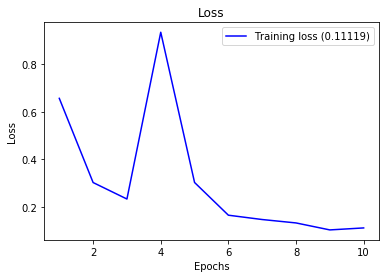

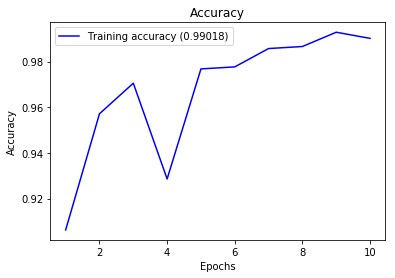

Epoch 1/10
1120/1120 [==============================] - 1s 840us/step - loss: 0.7483 - acc: 0.9045
Epoch 2/10
1120/1120 [==============================] - 1s 696us/step - loss: 0.3945 - acc: 0.9661
Epoch 3/10
1120/1120 [==============================] - 1s 808us/step - loss: 0.5134 - acc: 0.9554
Epoch 4/10
1120/1120 [==============================] - 1s 773us/step - loss: 0.1816 - acc: 0.9821
Epoch 5/10
1120/1120 [==============================] - 1s 791us/step - loss: 0.1572 - acc: 0.9848
Epoch 6/10
1120/1120 [==============================] - 1s 808us/step - loss: 0.1273 - acc: 0.9893
Epoch 7/10
1120/1120 [==============================] - 1s 835us/step - loss: 0.1511 - acc: 0.9875
Epoch 8/10
1120/1120 [==============================] - 1s 810us/step - loss: 0.1616 - acc: 0.9848
Epoch 9/10
1120/1120 [==============================] - 1s 726us/step - loss: 0.1004 - acc: 0.9937
Epoch 10/10
280/280 [==============================] - 0s 422us/step
acc: 95.36%
[98.21428571428571, 95.35714

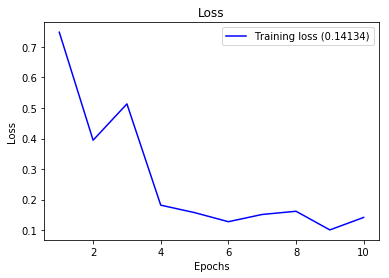

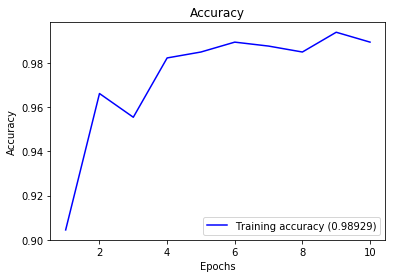

Epoch 1/10
1120/1120 [==============================] - 1s 875us/step - loss: 0.7687 - acc: 0.9036
Epoch 2/10
1120/1120 [==============================] - 1s 693us/step - loss: 0.3344 - acc: 0.9661
Epoch 3/10
1120/1120 [==============================] - 1s 702us/step - loss: 0.2518 - acc: 0.9741
Epoch 4/10
1120/1120 [==============================] - 1s 691us/step - loss: 0.2506 - acc: 0.9661
Epoch 5/10
1120/1120 [==============================] - 1s 754us/step - loss: 0.2284 - acc: 0.9795
Epoch 6/10
1120/1120 [==============================] - 1s 725us/step - loss: 0.2471 - acc: 0.9804
Epoch 7/10
1120/1120 [==============================] - 1s 705us/step - loss: 0.2644 - acc: 0.9804
Epoch 8/10
1120/1120 [==============================] - 1s 799us/step - loss: 0.1873 - acc: 0.9857
Epoch 9/10
1120/1120 [==============================] - 1s 699us/step - loss: 0.1958 - acc: 0.9866
Epoch 10/10
280/280 [==============================] - 0s 692us/step
acc: 95.36%
[98.21428571428571, 95.35714

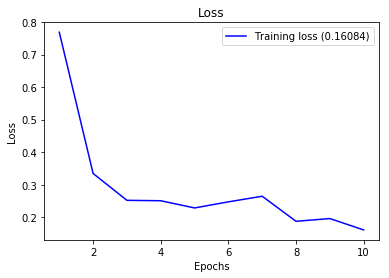

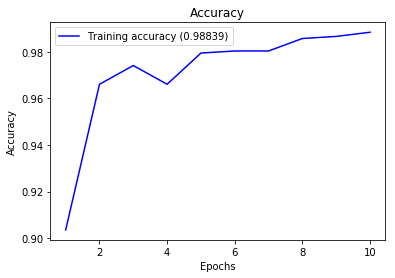

Epoch 1/10
1120/1120 [==============================] - 1s 923us/step - loss: 0.6512 - acc: 0.9125
Epoch 2/10
1120/1120 [==============================] - 1s 711us/step - loss: 0.3646 - acc: 0.9562
Epoch 3/10
1120/1120 [==============================] - 1s 714us/step - loss: 0.2975 - acc: 0.9643
Epoch 4/10
1120/1120 [==============================] - 1s 712us/step - loss: 0.2059 - acc: 0.9741
Epoch 5/10
1120/1120 [==============================] - 1s 706us/step - loss: 0.2224 - acc: 0.9768
Epoch 6/10
1120/1120 [==============================] - 1s 696us/step - loss: 0.2747 - acc: 0.9759
Epoch 7/10
1120/1120 [==============================] - 1s 716us/step - loss: 0.1437 - acc: 0.9857
Epoch 8/10
1120/1120 [==============================] - 1s 763us/step - loss: 0.1437 - acc: 0.9830
Epoch 9/10
1120/1120 [==============================] - 1s 836us/step - loss: 0.1051 - acc: 0.9893
Epoch 10/10
280/280 [==============================] - 0s 649us/step
acc: 97.14%
[98.21428571428571, 95.35714

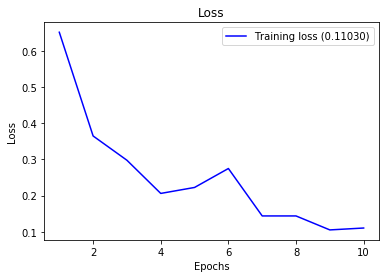

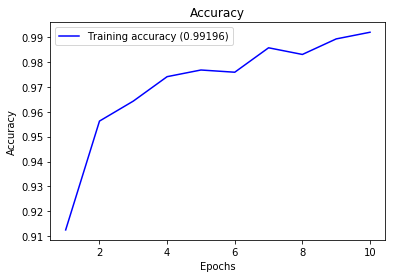

Epoch 1/10
1120/1120 [==============================] - 1s 1ms/step - loss: 0.9525 - acc: 0.8955
Epoch 2/10
1120/1120 [==============================] - 1s 868us/step - loss: 0.4415 - acc: 0.9509
Epoch 3/10
1120/1120 [==============================] - 1s 892us/step - loss: 0.2852 - acc: 0.9696
Epoch 4/10
1120/1120 [==============================] - 1s 840us/step - loss: 0.3354 - acc: 0.9679
Epoch 5/10
1120/1120 [==============================] - 1s 801us/step - loss: 0.5660 - acc: 0.9536
Epoch 6/10
1120/1120 [==============================] - 1s 851us/step - loss: 0.1702 - acc: 0.9795
Epoch 7/10
1120/1120 [==============================] - 1s 829us/step - loss: 0.1596 - acc: 0.9839
Epoch 8/10
1120/1120 [==============================] - 1s 820us/step - loss: 0.1610 - acc: 0.9866
Epoch 9/10
1120/1120 [==============================] - 1s 853us/step - loss: 0.2002 - acc: 0.9830
Epoch 10/10
280/280 [==============================] - 0s 588us/step
acc: 97.86%
[98.21428571428571, 95.3571426

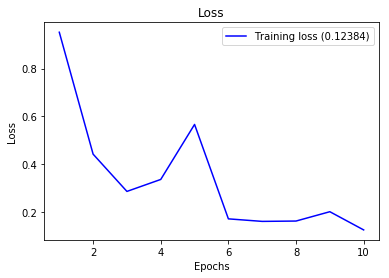

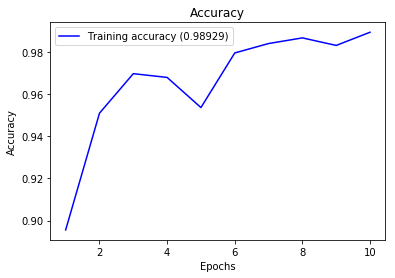

In [12]:
mlf.run_deep_learning_loop(features, label)

### Run Deep Learning Models on <100 Gene Signature for nt.coding

Epoch 1/10
1120/1120 [==============================] - 0s 271us/step - loss: 0.5175 - acc: 0.7857
Epoch 2/10
1120/1120 [==============================] - 0s 44us/step - loss: 0.3298 - acc: 0.8884
Epoch 3/10
1120/1120 [==============================] - 0s 40us/step - loss: 0.2545 - acc: 0.9143
Epoch 4/10
1120/1120 [==============================] - 0s 39us/step - loss: 0.2170 - acc: 0.9188
Epoch 5/10
1120/1120 [==============================] - 0s 34us/step - loss: 0.1988 - acc: 0.9286
Epoch 6/10
1120/1120 [==============================] - 0s 42us/step - loss: 0.1856 - acc: 0.9348
Epoch 7/10
1120/1120 [==============================] - 0s 39us/step - loss: 0.1765 - acc: 0.9366
Epoch 8/10
1120/1120 [==============================] - 0s 36us/step - loss: 0.1688 - acc: 0.9420
Epoch 9/10
1120/1120 [==============================] - 0s 44us/step - loss: 0.1641 - acc: 0.9446
Epoch 10/10
280/280 [==============================] - 0s 283us/step
acc: 92.14%
[92.14285731315613]


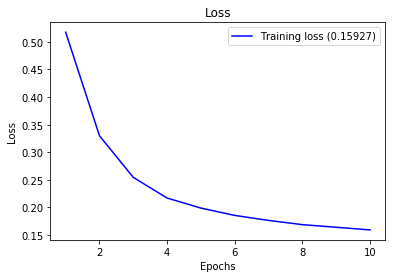

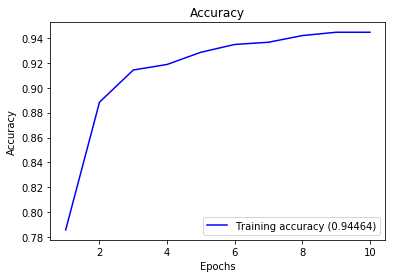

Epoch 1/10
1120/1120 [==============================] - 0s 354us/step - loss: 0.5462 - acc: 0.7455
Epoch 2/10
1120/1120 [==============================] - 0s 47us/step - loss: 0.3311 - acc: 0.9018
Epoch 3/10
1120/1120 [==============================] - 0s 45us/step - loss: 0.2505 - acc: 0.9143
Epoch 4/10
1120/1120 [==============================] - 0s 42us/step - loss: 0.2128 - acc: 0.9205
Epoch 5/10
1120/1120 [==============================] - 0s 41us/step - loss: 0.1934 - acc: 0.9304
Epoch 6/10
1120/1120 [==============================] - 0s 49us/step - loss: 0.1815 - acc: 0.9348
Epoch 7/10
1120/1120 [==============================] - 0s 63us/step - loss: 0.1709 - acc: 0.9366
Epoch 8/10
1120/1120 [==============================] - 0s 77us/step - loss: 0.1638 - acc: 0.9393
Epoch 9/10
1120/1120 [==============================] - 0s 78us/step - loss: 0.1589 - acc: 0.9420
Epoch 10/10
280/280 [==============================] - 0s 318us/step
acc: 93.21%
[92.14285731315613, 93.2142857142857

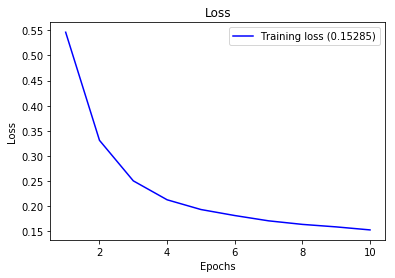

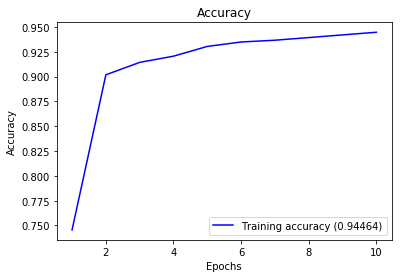

Epoch 1/10
1120/1120 [==============================] - 0s 424us/step - loss: 0.5552 - acc: 0.7375
Epoch 2/10
1120/1120 [==============================] - 0s 34us/step - loss: 0.3470 - acc: 0.8732
Epoch 3/10
1120/1120 [==============================] - 0s 39us/step - loss: 0.2587 - acc: 0.9071
Epoch 4/10
1120/1120 [==============================] - 0s 38us/step - loss: 0.2141 - acc: 0.9214
Epoch 5/10
1120/1120 [==============================] - 0s 40us/step - loss: 0.1879 - acc: 0.9268
Epoch 6/10
1120/1120 [==============================] - 0s 55us/step - loss: 0.1716 - acc: 0.9304
Epoch 7/10
1120/1120 [==============================] - 0s 60us/step - loss: 0.1603 - acc: 0.9366
Epoch 8/10
1120/1120 [==============================] - 0s 54us/step - loss: 0.1515 - acc: 0.9429
Epoch 9/10
1120/1120 [==============================] - 0s 59us/step - loss: 0.1441 - acc: 0.9446
Epoch 10/10
280/280 [==============================] - 0s 421us/step
acc: 90.71%
[92.14285731315613, 93.2142857142857

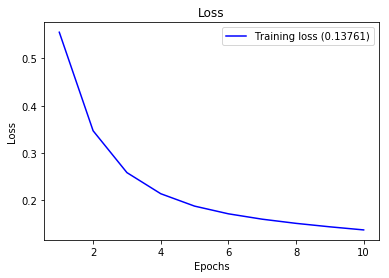

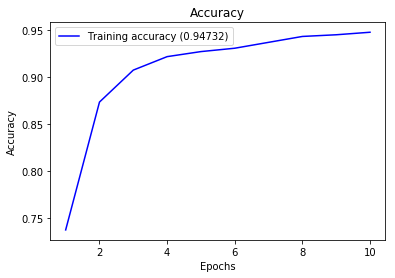

Epoch 1/10
1120/1120 [==============================] - 0s 370us/step - loss: 0.4443 - acc: 0.8286
Epoch 2/10
1120/1120 [==============================] - 0s 41us/step - loss: 0.2912 - acc: 0.8884
Epoch 3/10
1120/1120 [==============================] - 0s 47us/step - loss: 0.2383 - acc: 0.9098
Epoch 4/10
1120/1120 [==============================] - 0s 54us/step - loss: 0.2092 - acc: 0.9170
Epoch 5/10
1120/1120 [==============================] - 0s 55us/step - loss: 0.1920 - acc: 0.9196
Epoch 6/10
1120/1120 [==============================] - 0s 47us/step - loss: 0.1805 - acc: 0.9268
Epoch 7/10
1120/1120 [==============================] - 0s 35us/step - loss: 0.1710 - acc: 0.9312
Epoch 8/10
1120/1120 [==============================] - 0s 40us/step - loss: 0.1653 - acc: 0.9339
Epoch 9/10
1120/1120 [==============================] - 0s 38us/step - loss: 0.1603 - acc: 0.9393
Epoch 10/10
280/280 [==============================] - 0s 479us/step
acc: 95.36%
[92.14285731315613, 93.2142857142857

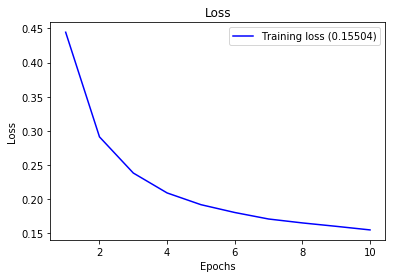

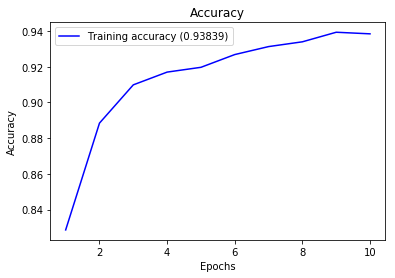

Epoch 1/10
1120/1120 [==============================] - 1s 457us/step - loss: 0.5021 - acc: 0.8062
Epoch 2/10
1120/1120 [==============================] - 0s 43us/step - loss: 0.3230 - acc: 0.8875
Epoch 3/10
1120/1120 [==============================] - 0s 41us/step - loss: 0.2497 - acc: 0.9134
Epoch 4/10
1120/1120 [==============================] - 0s 52us/step - loss: 0.2137 - acc: 0.9241
Epoch 5/10
1120/1120 [==============================] - 0s 43us/step - loss: 0.1942 - acc: 0.9268
Epoch 6/10
1120/1120 [==============================] - 0s 40us/step - loss: 0.1809 - acc: 0.9348
Epoch 7/10
1120/1120 [==============================] - 0s 38us/step - loss: 0.1712 - acc: 0.9393
Epoch 8/10
1120/1120 [==============================] - 0s 48us/step - loss: 0.1649 - acc: 0.9411
Epoch 9/10
1120/1120 [==============================] - 0s 49us/step - loss: 0.1589 - acc: 0.9446
Epoch 10/10
280/280 [==============================] - 0s 490us/step
acc: 93.93%
[92.14285731315613, 93.2142857142857

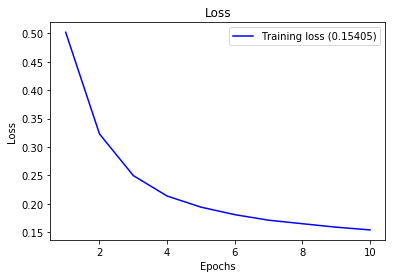

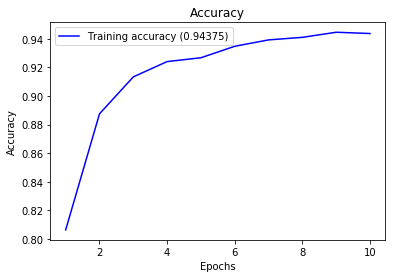

In [13]:
mlf.run_deep_learning_loop(gene_selection_99_features_ntcoding, label)

### Tree-Based Pipeline Optimization Tool (TPOT) to Find a Better Solution to Part 1 for nt.coding

In [ ]:
from tpot import TPOTClassifier
from sklearn import preprocessing, cross_validation, svm, metrics, tree, decomposition, svm
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
scaler_x = preprocessing.StandardScaler().fit(X_train)
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)
y_train = np.ravel(y_train,order='C')
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
print(tpot.fitted_pipeline_)

### Read in Data - nt.all

In [14]:
nt_all = pd.read_csv('/Users/saptarshighose/Downloads/nt.all.csv')

In [15]:
nt_all.head()

,Type,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,ENSG00000001461.15,ENSG00000001497.15,ENSG00000001561.6,ENSG00000001617.10,ENSG00000001626.13,ENSG00000001629.8,ENSG00000001630.14,ENSG00000001631.13,ENSG00000002016.15,ENSG00000002079.11,ENSG00000002330.12,ENSG00000002549.11,ENSG00000002586.16,ENSG00000002587.8,ENSG00000002726.18,ENSG00000002745.11,ENSG00000002746.13,ENSG00000002822.14,ENSG00000002834.16,ENSG00000002919.13,ENSG00000002933.6,ENSG00000003056.6,ENSG00000003096.12,ENSG00000003137.7,ENSG00000003147.16,ENSG00000003249.12,ENSG00000003393.13,ENSG00000003400.13,ENSG00000003402.18,ENSG00000003436.13,ENSG00000003509.14,ENSG00000003756.15,ENSG00000003987.12,ENSG00000003989.15,ENSG00000004059.9,ENSG00000004139.12,ENSG00000004142.10,ENSG00000004399.11,ENSG00000004455.15,ENSG00000004468.11,ENSG00000004478.7,ENSG00000004487.14,ENSG00000004534.13,ENSG00000004660.13,ENSG00000004700.14,ENSG00000004766.14,ENSG00000004776.10,ENSG00000004777.17,ENSG00000004779.8,ENSG00000004799.7,ENSG00000004809.12,ENSG00000004838.12,ENSG00000004846.15,ENSG00000004848.6,ENSG00000004864.12,ENSG00000004866.17,ENSG00000004897.10,ENSG00000004939.12,ENSG00000004948.12,ENSG00000004961.13,ENSG00000004975.10,ENSG00000005001.8,ENSG00000005007.11,ENSG00000005020.11,ENSG00000005022.5,ENSG00000005059.14,ENSG00000005073.5,ENSG00000005075.14,ENSG00000005100.11,ENSG00000005102.11,ENSG00000005108.14,ENSG00000005156.10,ENSG00000005175.8,ENSG00000005187.10,ENSG00000005189.18,ENSG00000005194.13,ENSG00000005206.15,ENSG00000005238.18,ENSG00000005243.8,ENSG00000005249.11,ENSG00000005302.16,ENSG00000005339.11,ENSG00000005379.14,ENSG00000005381.7,ENSG00000005421.7,ENSG00000005436.12,ENSG00000005448.15,ENSG00000005469.10,ENSG00000005471.14,ENSG00000005483.18,ENSG00000005486.15,ENSG00000005513.9,ENSG00000005700.13,ENSG00000005801.15,ENSG00000005810.16,ENSG00000005812.9,ENSG00000005844.16,ENSG00000005882.10,ENSG00000005884.16,ENSG00000005889.14,ENSG00000005893.14,ENSG00000005961.16,ENSG00000005981.11,ENSG00000006007.10,ENSG00000006015.16,ENSG00000006016.9,ENSG00000006025.10,ENSG00000006042.10,ENSG00000006047.11,ENSG00000006059.3,ENSG00000006062.12,ENSG00000006071.10,ENSG00000006116.3,ENSG00000006118.13,ENSG00000006125.15,ENSG00000006128.10,ENSG00000006194.9,ENSG00000006210.6,ENSG00000006282.18,ENSG00000006283.16,ENSG00000006327.12,ENSG00000006377.10,ENSG00000006432.14,ENSG00000006451.6,ENSG00000006453.12,ENSG00000006459.9,ENSG00000006468.12,ENSG00000006530.14,ENSG00000006534.14,ENSG00000006555.9,ENSG00000006576.15,ENSG00000006606.7,ENSG00000006607.12,ENSG00000006611.14,ENSG00000006625.16,ENSG00000006634.6,ENSG00000006638.10,ENSG00000006652.12,ENSG00000006659.11,ENSG00000006695.9,ENSG00000006704.9,ENSG00000006712.13,ENSG00000006715.14,ENSG00000006740.15,ENSG00000006744.17,ENSG00000006747.13,ENSG00000006756.14,ENSG00000006757.10,ENSG00000006788.11,ENSG00000006831.9,ENSG00000006837.10,ENSG00000007001.11,ENSG00000007038.9,ENSG00000007047.13,ENSG00000007062.10,ENSG00000007080.9,ENSG00000007129.16,ENSG00000007168.11,ENSG00000007171.15,ENSG00000007174.16,ENSG00000007202.13,ENSG00000007216.13,ENSG00000007237.17,ENSG00000007255.9,ENSG00000007264.12,ENSG00000007306.13,ENSG00000007312.11,ENSG00000007314.10,ENSG00000007341.17,ENSG00000007350.15,ENSG00000007372.19,ENSG00000007376.6,ENSG00000007384.14,ENSG00000007392.15,ENSG00000007402.10,ENSG00000007516.12,ENSG00000007520.3,ENSG00000007541.13,ENSG00000007545.14,ENSG00000007866.17,ENSG00000007908.14,ENSG00000007923.14,ENSG00000007933.11,ENSG00000007944.13,ENSG00000007952.16,ENSG00000007968.6,ENSG00000008018.8,ENSG00000008056.11,ENSG00000008083.12,ENSG00000008086.9,ENSG00000008118.8,ENSG00000008128.21,ENSG00000008130.14,ENSG00000008196.11,ENSG00000008197.4,ENSG00000008226.18,ENSG00000008256.14,ENSG00000008277.13,ENSG00000008282.6,ENSG00000008283.14,ENSG00000008294.19,ENSG00000008

In [16]:
features_all = nt_coding.loc[:, nt_coding.columns != 'Type']

In [17]:
label_all = nt_coding.loc[:, nt_coding.columns == 'Type']

### Run Machine Learning Pipeline Loop for nt.all (Random Forest, Logistic Regression, and Naive Bayes Algorithms)

In [18]:
mlf.run_simple_loop(features_all, label_all, ['LR','NB','RF'])

LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.585741,0.498214,1.000000,1.000000,0.910714,0.866071,0.727679,0.651786,0.557143,0.019713,0.039427,0.091398,0.173835,0.292115,0.392473,0.559140,0.038664,0.075862,0.166124,0.289552,0.416880,0.489933,0.558140,"[[459, 103], [351, 207]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.983763,0.498214,1.000000,1.000000,1.000000,1.000000,0.986607,0.979167,0.957143,0.019713,0.039427,0.100358,0.200717,0.396057,0.589606,0.960573,0.038664,0.075862,0.182410,0.334328,0.565217,0.736018,0.958855,"[[540, 22], [29, 529]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.978555,0.498214,1.000000,1.000000,1.000000,0.991071,0.982143,0.982143,0.937500,0.019713,0.039427,0.100358,0.198925,0.394265,0.591398,0.940860,0.038664,0.075862,0.182410,0.331343,0.562660,0.738255,0.939177,"[[524, 38], [27, 531]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.983294,0.498214,1.000000,1.000000,1.000000,1.000000,0.977679,0.979167,0.955357,0.019713,0.039427,0.100358,0.200717,0.392473,0.589606,0.958781,0.038664,0.075862,0.182410,0.334328,0.560102,0.736018,0.957066,"[[539, 23], [28, 530]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.984081,0.498214,1.000000,1.000000,1.000000,1.000000,0.991071,0.982143,0.950000,0.019713,0.039427,0.100358,0.200717,0.397849,0.591398,0.953405,0.038664,0.075862,0.182410,0.334328,0.567775,0.738255,0.951699,"[[534, 28], [25, 533]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.983138,0.498214,1.000000,1.000000,1.000000,0.991071,0.977679,0.979167,0.955357,0.019713,0.039427,0.100358,0.198925,0.392473,0.589606,0.958781,0.038664,0.075862,0.182410,0.331343,0.560102,0.736018,0.957066,"[[539, 23], [26, 532]]"
6,NB,GaussianNB(priors=None),{},0.827632,0.498214,0.909091,0.954545,0.982143,0.991071,0.691964,0.791667,0.873214,0.017921,0.037634,0.098566,0.198925,0.277778,0.476703,0.876344,0.035149,0.072414,0.179153,0.331343,0.396419,0.595078,0.874776,"[[438, 124], [69, 489]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.988855,0.498214,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.953571,0.019713,0.039427,0.100358,0.200717,0.399642,0.598566,0.956989,0.038664,0.075862,0.182410,0.334328,0.570332,0.747204,0.955277,"[[532, 30], [18, 540]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.988826,0.498214,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.957143,0.019713,0.039427,0.100358,0.200717,0.399642,0.598566,0.960573,0.038664,0.075862,0.182410,0.334328,0.570332,0.747204,0.958855,"[[533, 29], [16, 542]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.987159,0.498214,1.000000,1.000000,1.000000,1.000000,0.995536,0.988095,0.950000,0.019713,0.039427,0.100358,0.200717,0.399642,0.594982,0.953405,0.038664,0.075862,0.182410,0.334328,0.570332,0.742729,0.951699,"[[527, 35], [19, 539]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.676881,0.495536,0.727273,0.772727,0.696429,0.750000,0.772321,0.741071,0.637500,0.014414,0.030631,0.070270,0.151351,0.311712,0.448649,0.643243,0.028269,0.058925,0.127660,0.251874,0.444159,0.558923,0.640359,"[[491, 74], [320, 235]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.990529,0.495536,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.964286,0.019820,0.039640,0.100901,0.201802,0.401802,0.601802,0.972973,0.038869,0.076256,0.183306,0.335832,0.572529,0.749719,0.968610,"[[551, 14], [24, 531]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.983819,0.495536,1.000000,1.000000,1.000000,1.000000,0.986607,0.979167,0.942857,0.019820,0.039640,0.100901,0.201802,0.398198,0.592793,0.951351,0.038869,0.076256,0.183306,0.335832,0.567394,0.738496,0.947085,"[[545, 20], [45, 510]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.990615,0.495536,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.962500,0.019820,0.039640,0.100901,0.201802,0.401802,0.601802,0.971171,0.038869,0.076256,0.183306,0.335832,0.572529,0.749719,0.966816,"[[551, 14], [21, 534]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.987375,0.495536,1.000000,1.000000,1.000000,1.000000,0.995536,0.988095,0.951786,0.019820,0.039640,0.100901,0.201802,0.401802,0.598198,0.960360,0.038869,0.076256,0.183306,0.335832,0.572529,0.745230,0.956054,"[[548, 17], [40, 515]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.990430,0.495536,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.962500,0.019820,0.039640,0.100901,0.201802,0.401802,0.601802,0.971171,0.038869,0.076256,0.183306,0.335832,0.572529,0.749719,0.966816,"[[550, 15], [21, 534]]"
6,NB,GaussianNB(priors=None),{},0.800279,0.495536,0.909091,0.954545,0.982143,0.991071,0.687500,0.750000,0.848214,0.018018,0.037838,0.099099,0.200000,0.277477,0.454054,0.855856,0.035336,0.072790,0.180033,0.332834,0.395379,0.565657,0.852018,"[[420, 145], [80, 475]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.990981,0.495536,1.000000,1.000000,1.000000,1.000000,1.000000,0.997024,0.957143,0.019820,0.039640,0.100901,0.201802,0.403604,0.603604,0.965766,0.038869,0.076256,0.183306,0.335832,0.575096,0.751964,0.961435,"[[542, 23], [19, 536]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.990162,0.495536,1.000000,1.000000,1.000000,1.000000,1.000000,0.994048,0.958929,0.019820,0.039640,0.100901,0.201802,0.403604,0.601802,0.967568,0.038869,0.076256,0.183306,0.335832,0.575096,0.749719,0.963229,"[[542, 23], [20, 535]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.986781,0.495536,1.000000,1.000000,1.000000,1.000000,1.000000,0.997024,0.944643,0.019820,0.039640,0.100901,0.201802,0.403604,0.603604,0.953153,0.038869,0.076256,0.183306,0.335832,0.575096,0.751964,0.948879,"[[528, 37], [20, 535]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.764538,0.503571,0.909091,0.954545,0.946429,0.937500,0.870536,0.800595,0.680357,0.017730,0.037234,0.093972,0.186170,0.345745,0.476950,0.675532,0.034783,0.071672,0.170968,0.310651,0.494924,0.597778,0.677936,"[[448, 108], [255, 309]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.991218,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.962500,0.019504,0.039007,0.099291,0.198582,0.395390,0.592199,0.955674,0.038261,0.075085,0.180645,0.331361,0.565990,0.742222,0.959075,"[[542, 14], [35, 529]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.986099,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.988095,0.948214,0.019504,0.039007,0.099291,0.198582,0.395390,0.588652,0.941489,0.038261,0.075085,0.180645,0.331361,0.565990,0.737778,0.944840,"[[530, 26], [45, 519]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.991336,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.964286,0.019504,0.039007,0.099291,0.198582,0.395390,0.592199,0.957447,0.038261,0.075085,0.180645,0.331361,0.565990,0.742222,0.960854,"[[540, 16], [36, 528]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.989027,0.503571,1.000000,1.000000,1.000000,0.991071,0.995536,0.991071,0.953571,0.019504,0.039007,0.099291,0.196809,0.395390,0.590426,0.946809,0.038261,0.075085,0.180645,0.328402,0.565990,0.740000,0.950178,"[[540, 16], [39, 525]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.991157,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.964286,0.019504,0.039007,0.099291,0.198582,0.395390,0.592199,0.957447,0.038261,0.075085,0.180645,0.331361,0.565990,0.742222,0.960854,"[[540, 16], [34, 530]]"
6,NB,GaussianNB(priors=None),{},0.820407,0.503571,0.909091,0.954545,0.982143,0.991071,0.687500,0.767857,0.858929,0.017730,0.037234,0.097518,0.196809,0.273050,0.457447,0.852837,0.034783,0.071672,0.177419,0.328402,0.390863,0.573333,0.855872,"[[437, 119], [83, 481]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.991001,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.997024,0.964286,0.019504,0.039007,0.099291,0.198582,0.395390,0.593972,0.957447,0.038261,0.075085,0.180645,0.331361,0.565990,0.744444,0.960854,"[[536, 20], [29, 535]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.990762,0.503571,1.000000,1.000000,0.982143,0.991071,0.995536,0.997024,0.962500,0.019504,0.039007,0.097518,0.196809,0.395390,0.593972,0.955674,0.038261,0.075085,0.177419,0.328402,0.565990,0.744444,0.959075,"[[539, 17], [27, 537]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.985545,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.994048,0.948214,0.019504,0.039007,0.099291,0.198582,0.395390,0.592199,0.941489,0.038261,0.075085,0.180645,0.331361,0.565990,0.742222,0.944840,"[[527, 29], [32, 532]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.650424,0.502679,0.818182,0.863636,0.785714,0.696429,0.633929,0.610119,0.582143,0.015986,0.033748,0.078153,0.138544,0.252220,0.364121,0.579041,0.031359,0.064957,0.142165,0.231111,0.360864,0.456062,0.580588,"[[401, 156], [325, 238]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.992796,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.971429,0.019538,0.039076,0.099467,0.198934,0.397869,0.596803,0.966252,0.038328,0.075214,0.180937,0.331852,0.569250,0.747497,0.968833,"[[546, 11], [34, 529]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.991741,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.975000,0.019538,0.039076,0.099467,0.198934,0.397869,0.596803,0.969805,0.038328,0.075214,0.180937,0.331852,0.569250,0.747497,0.972395,"[[548, 9], [47, 516]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.992803,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.971429,0.019538,0.039076,0.099467,0.198934,0.397869,0.596803,0.966252,0.038328,0.075214,0.180937,0.331852,0.569250,0.747497,0.968833,"[[546, 11], [31, 532]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.992516,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.976786,0.019538,0.039076,0.099467,0.198934,0.397869,0.596803,0.971581,0.038328,0.075214,0.180937,0.331852,0.569250,0.747497,0.974176,"[[548, 9], [49, 514]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.992672,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.971429,0.019538,0.039076,0.099467,0.198934,0.397869,0.596803,0.966252,0.038328,0.075214,0.180937,0.331852,0.569250,0.747497,0.968833,"[[545, 12], [29, 534]]"
6,NB,GaussianNB(priors=None),{},0.878721,0.502679,1.000000,1.000000,1.000000,1.000000,0.767857,0.845238,0.905357,0.019538,0.039076,0.099467,0.198934,0.305506,0.504440,0.900533,0.038328,0.075214,0.180937,0.331852,0.437103,0.631813,0.902939,"[[505, 52], [84, 479]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.991081,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.960714,0.019538,0.039076,0.099467,0.198934,0.397869,0.596803,0.955595,0.038328,0.075214,0.180937,0.331852,0.569250,0.747497,0.958148,"[[546, 11], [43, 520]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.991792,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,0.997024,0.969643,0.019538,0.039076,0.099467,0.198934,0.397869,0.595027,0.964476,0.038328,0.075214,0.180937,0.331852,0.569250,0.745273,0.967053,"[[546, 11], [34, 529]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.989659,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,0.991071,0.958929,0.019538,0.039076,0.099467,0.198934,0.397869,0.591474,0.953819,0.038328,0.075214,0.180937,0.331852,0.569250,0.740823,0.956367,"[[547, 10], [43, 520]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.567857,0.5,0.727273,0.863636,0.767857,0.803571,0.732143,0.657738,0.564286,0.014286,0.033929,0.076786,0.160714,0.292857,0.394643,0.564286,0.028021,0.065292,0.139610,0.267857,0.418367,0.493304,0.564286,"[[449, 111], [344, 216]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.988964,0.5,1.000000,1.000000,1.000000,1.000000,1.000000,0.988095,0.967857,0.019643,0.039286,0.100000,0.200000,0.400000,0.592857,0.967857,0.038529,0.075601,0.181818,0.333333,0.571429,0.741071,0.967857,"[[545, 15], [22, 538]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.984515,0.5,1.000000,1.000000,1.000000,1.000000,1.000000,0.997024,0.957143,0.019643,0.039286,0.100000,0.200000,0.400000,0.598214,0.957143,0.038529,0.075601,0.181818,0.333333,0.571429,0.747768,0.957143,"[[543, 17], [39, 521]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.988964,0.5,1.000000,1.000000,1.000000,1.000000,0.995536,0.988095,0.967857,0.019643,0.039286,0.100000,0.200000,0.398214,0.592857,0.967857,0.038529,0.075601,0.181818,0.333333,0.568878,0.741071,0.967857,"[[546, 14], [22, 538]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.988533,0.5,1.000000,1.000000,1.000000,1.000000,1.000000,0.994048,0.967857,0.019643,0.039286,0.100000,0.200000,0.400000,0.596429,0.967857,0.038529,0.075601,0.181818,0.333333,0.571429,0.745536,0.967857,"[[544, 16], [31, 529]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.989005,0.5,1.000000,1.000000,1.000000,1.000000,0.995536,0.991071,0.967857,0.019643,0.039286,0.100000,0.200000,0.398214,0.594643,0.967857,0.038529,0.075601,0.181818,0.333333,0.568878,0.743304,0.967857,"[[546, 14], [22, 538]]"
6,NB,GaussianNB(priors=None),{},0.877396,0.5,0.909091,0.954545,0.982143,0.991071,0.825893,0.880952,0.926786,0.017857,0.037500,0.098214,0.198214,0.330357,0.528571,0.926786,0.035026,0.072165,0.178571,0.330357,0.471939,0.660714,0.926786,"[[463, 97], [41, 519]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.989742,0.5,1.000000,1.000000,1.000000,1.000000,1.000000,0.994048,0.958929,0.019643,0.039286,0.100000,0.200000,0.400000,0.596429,0.958929,0.038529,0.075601,0.181818,0.333333,0.571429,0.745536,0.958929,"[[536, 24], [21, 539]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.989267,0.5,1.000000,1.000000,1.000000,1.000000,1.000000,0.991071,0.955357,0.019643,0.039286,0.100000,0.200000,0.400000,0.594643,0.955357,0.038529,0.075601,0.181818,0.333333,0.571429,0.743304,0.955357,"[[535, 25], [24, 536]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.987707,0.5,1.000000,1.000000,1.000000,1.000000,1.000000,0.991071,0.950000,0.019643,0.039286,0.100000,0.200000,0.400000,0.594643,0.950000,0.038529,0.075601,0.181818,0.333333,0.571429,0.743304,0.950000,"[[534, 26], [36, 524]]"


lr_model1:  0.6490882343229968
lr_model2:  0.9894537582362914
lr_model3:  0.9849459266266744
lr_model4:  0.9894021014906424
lr_model5:  0.9883063633691836
lr_model6:  0.9892802843458199

nb_model1:  0.840887023280333

rf_model1:  0.9903319551630482
rf_model2:  0.9901616630514518
rf_model3:  0.9873700853383738
rf_model4:  0.9870486661511281
rf_model5:  0.9903545886799632
rf_model6:  0.9903746733314083
rf_model7:  0.9884160443794494
rf_model8:  0.9880251090560208


### Feature Selection: <100 Gene Signature

In [19]:
selector = SelectKBest(chi2, k=99)
selector.fit(features_all, label_all)

# X_new = selector.transform(features)
# print(X_new.shape)

feature_selection_99_all = features_all.columns[selector.get_support(indices=True)]

feature_selection_all_list = feature_selection_99_all.tolist()
print(feature_selection_all_list)

['ENSG00000007306.13', 'ENSG00000034510.5', 'ENSG00000042832.10', 'ENSG00000091138.11', 'ENSG00000091583.9', 'ENSG00000096088.15', 'ENSG00000101335.8', 'ENSG00000104879.4', 'ENSG00000105427.8', 'ENSG00000106927.10', 'ENSG00000107796.11', 'ENSG00000108821.12', 'ENSG00000110169.9', 'ENSG00000110245.10', 'ENSG00000111640.13', 'ENSG00000118137.8', 'ENSG00000118271.8', 'ENSG00000118785.12', 'ENSG00000120129.5', 'ENSG00000120738.7', 'ENSG00000122585.6', 'ENSG00000122852.13', 'ENSG00000124157.6', 'ENSG00000124233.11', 'ENSG00000125144.12', 'ENSG00000125148.6', 'ENSG00000125780.11', 'ENSG00000126549.8', 'ENSG00000128016.5', 'ENSG00000128422.14', 'ENSG00000130176.6', 'ENSG00000132465.9', 'ENSG00000133392.15', 'ENSG00000134339.7', 'ENSG00000134551.11', 'ENSG00000136872.16', 'ENSG00000138207.11', 'ENSG00000143536.7', 'ENSG00000143546.8', 'ENSG00000143632.13', 'ENSG00000145192.11', 'ENSG00000145321.11', 'ENSG00000149021.5', 'ENSG00000149591.15', 'ENSG00000159763.3', 'ENSG00000160349.8', 'ENSG00000

In [20]:
gene_selection_99_features_ntall = nt_all[feature_selection_all_list]

### Run Machine Learning Pipeline Loop on <100 Gene Signature for nt.all ((Random Forest, Logistic Regression, and Naive Bayes Algorithms))

In [21]:
mlf.run_simple_loop(gene_selection_99_features_ntall, label, ['LR','NB','RF'])

LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.483539,0.498214,0.909091,0.954545,0.982143,0.991071,0.718750,0.809524,0.883929,0.017921,0.037634,0.098566,0.198925,0.288530,0.487455,0.887097,0.035149,0.072414,0.179153,0.331343,0.411765,0.608501,0.885510,"[[7, 555], [2, 556]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.952837,0.498214,1.000000,1.000000,1.000000,0.991071,0.982143,0.973214,0.880357,0.019713,0.039427,0.100358,0.198925,0.394265,0.586022,0.883513,0.038664,0.075862,0.182410,0.331343,0.562660,0.731544,0.881932,"[[462, 100], [39, 519]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.945937,0.498214,0.909091,0.909091,0.946429,0.955357,0.955357,0.958333,0.885714,0.017921,0.035842,0.094982,0.191756,0.383513,0.577061,0.888889,0.035149,0.068966,0.172638,0.319403,0.547315,0.720358,0.887299,"[[474, 88], [34, 524]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.963265,0.498214,0.909091,0.954545,0.982143,0.982143,0.982143,0.973214,0.914286,0.017921,0.037634,0.098566,0.197133,0.394265,0.586022,0.917563,0.035149,0.072414,0.179153,0.328358,0.562660,0.731544,0.915921,"[[477, 85], [29, 529]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.953676,0.498214,0.818182,0.909091,0.928571,0.937500,0.959821,0.961310,0.914286,0.016129,0.035842,0.093190,0.188172,0.385305,0.578853,0.917563,0.031634,0.068966,0.169381,0.313433,0.549872,0.722595,0.915921,"[[489, 73], [30, 528]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.959655,0.498214,0.909091,0.954545,0.964286,0.946429,0.968750,0.967262,0.916071,0.017921,0.037634,0.096774,0.189964,0.388889,0.582437,0.919355,0.035149,0.072414,0.175896,0.316418,0.554987,0.727069,0.917710,"[[498, 64], [33, 525]]"
6,NB,GaussianNB(priors=None),{},0.851312,0.498214,0.909091,0.954545,0.982143,0.991071,0.745536,0.827381,0.894643,0.017921,0.037634,0.098566,0.198925,0.299283,0.498208,0.897849,0.035149,0.072414,0.179153,0.331343,0.427110,0.621924,0.896243,"[[416, 146], [52, 506]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.979448,0.498214,1.000000,1.000000,1.000000,0.982143,0.991071,0.988095,0.937500,0.019713,0.039427,0.100358,0.197133,0.397849,0.594982,0.940860,0.038664,0.075862,0.182410,0.328358,0.567775,0.742729,0.939177,"[[526, 36], [33, 525]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.977375,0.498214,1.000000,1.000000,0.982143,0.991071,0.991071,0.985119,0.926786,0.019713,0.039427,0.098566,0.198925,0.397849,0.593190,0.930108,0.038664,0.075862,0.179153,0.331343,0.567775,0.740492,0.928444,"[[522, 40], [40, 518]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.981231,0.498214,1.000000,1.000000,1.000000,1.000000,0.991071,0.988095,0.935714,0.019713,0.039427,0.100358,0.200717,0.397849,0.594982,0.939068,0.038664,0.075862,0.182410,0.334328,0.567775,0.742729,0.937388,"[[526, 36], [34, 524]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.455390,0.495536,0.000000,0.000000,0.000000,0.375000,0.308036,0.375000,0.623214,0.000000,0.000000,0.000000,0.075676,0.124324,0.227027,0.628829,NaN,NaN,NaN,0.125937,0.177150,0.282828,0.626009,"[[5, 560], [11, 544]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.961601,0.495536,1.000000,1.000000,1.000000,0.991071,0.982143,0.982143,0.900000,0.019820,0.039640,0.100901,0.200000,0.396396,0.594595,0.908108,0.038869,0.076256,0.183306,0.332834,0.564827,0.740741,0.904036,"[[476, 89], [36, 519]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.945952,0.495536,1.000000,1.000000,0.982143,0.973214,0.973214,0.973214,0.887500,0.019820,0.039640,0.099099,0.196396,0.392793,0.589189,0.895495,0.038869,0.076256,0.180033,0.326837,0.559692,0.734007,0.891480,"[[463, 102], [41, 514]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.964809,0.495536,1.000000,1.000000,1.000000,1.000000,0.977679,0.976190,0.907143,0.019820,0.039640,0.100901,0.201802,0.394595,0.590991,0.915315,0.038869,0.076256,0.183306,0.335832,0.562259,0.736251,0.911211,"[[495, 70], [40, 515]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.960038,0.495536,1.000000,1.000000,1.000000,0.991071,0.968750,0.973214,0.910714,0.019820,0.039640,0.100901,0.200000,0.390991,0.589189,0.918919,0.038869,0.076256,0.183306,0.332834,0.557125,0.734007,0.914798,"[[497, 68], [40, 515]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.959050,0.495536,1.000000,1.000000,1.000000,0.991071,0.977679,0.973214,0.901786,0.019820,0.039640,0.100901,0.200000,0.394595,0.589189,0.909910,0.038869,0.076256,0.183306,0.332834,0.562259,0.734007,0.905830,"[[499, 66], [40, 515]]"
6,NB,GaussianNB(priors=None),{},0.866856,0.495536,0.909091,0.954545,0.982143,0.991071,0.687500,0.785714,0.869643,0.018018,0.037838,0.099099,0.200000,0.277477,0.475676,0.877477,0.035336,0.072790,0.180033,0.332834,0.395379,0.592593,0.873543,"[[449, 116], [57, 498]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.980301,0.495536,1.000000,1.000000,1.000000,1.000000,0.991071,0.988095,0.933929,0.019820,0.039640,0.100901,0.201802,0.400000,0.598198,0.942342,0.038869,0.076256,0.183306,0.335832,0.569961,0.745230,0.938117,"[[528, 37], [32, 523]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.981325,0.495536,1.000000,1.000000,1.000000,1.000000,0.991071,0.985119,0.933929,0.019820,0.039640,0.100901,0.201802,0.400000,0.596396,0.942342,0.038869,0.076256,0.183306,0.335832,0.569961,0.742985,0.938117,"[[529, 36], [32, 523]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.978449,0.495536,1.000000,1.000000,1.000000,1.000000,0.995536,0.988095,0.932143,0.019820,0.039640,0.100901,0.201802,0.401802,0.598198,0.940541,0.038869,0.076256,0.183306,0.335832,0.572529,0.745230,0.936323,"[[522, 43], [33, 522]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.500000,0.503571,0.909091,0.909091,0.964286,0.982143,0.991071,0.994048,0.996429,0.017730,0.035461,0.095745,0.195035,0.393617,0.592199,0.989362,0.034783,0.068259,0.174194,0.325444,0.563452,0.742222,0.992883,"[[556, 0], [564, 0]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.955227,0.503571,1.000000,1.000000,1.000000,0.991071,0.991071,0.982143,0.889286,0.019504,0.039007,0.099291,0.196809,0.393617,0.585106,0.882979,0.038261,0.075085,0.180645,0.328402,0.563452,0.733333,0.886121,"[[475, 81], [47, 517]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.954991,0.503571,1.000000,1.000000,1.000000,0.991071,0.982143,0.967262,0.903571,0.019504,0.039007,0.099291,0.196809,0.390071,0.576241,0.897163,0.038261,0.075085,0.180645,0.328402,0.558376,0.722222,0.900356,"[[492, 64], [50, 514]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.967425,0.503571,1.000000,1.000000,1.000000,0.991071,0.991071,0.982143,0.914286,0.019504,0.039007,0.099291,0.196809,0.393617,0.585106,0.907801,0.038261,0.075085,0.180645,0.328402,0.563452,0.733333,0.911032,"[[504, 52], [43, 521]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.967119,0.503571,1.000000,1.000000,1.000000,0.991071,0.995536,0.982143,0.925000,0.019504,0.039007,0.099291,0.196809,0.395390,0.585106,0.918440,0.038261,0.075085,0.180645,0.328402,0.565990,0.733333,0.921708,"[[508, 48], [39, 525]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.973111,0.503571,1.000000,1.000000,1.000000,0.991071,0.977679,0.982143,0.933929,0.019504,0.039007,0.099291,0.196809,0.388298,0.585106,0.927305,0.038261,0.075085,0.180645,0.328402,0.555838,0.733333,0.930605,"[[522, 34], [46, 518]]"
6,NB,GaussianNB(priors=None),{},0.805295,0.503571,0.909091,0.954545,0.982143,0.991071,0.687500,0.720238,0.830357,0.017730,0.037234,0.097518,0.196809,0.273050,0.429078,0.824468,0.034783,0.071672,0.177419,0.328402,0.390863,0.537778,0.827402,"[[399, 157], [88, 476]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.980331,0.503571,1.000000,1.000000,1.000000,1.000000,0.991071,0.988095,0.939286,0.019504,0.039007,0.099291,0.198582,0.393617,0.588652,0.932624,0.038261,0.075085,0.180645,0.331361,0.563452,0.737778,0.935943,"[[529, 27], [48, 516]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.980592,0.503571,1.000000,1.000000,1.000000,1.000000,1.000000,0.988095,0.935714,0.019504,0.039007,0.099291,0.198582,0.397163,0.588652,0.929078,0.038261,0.075085,0.180645,0.331361,0.568528,0.737778,0.932384,"[[526, 30], [47, 517]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.979285,0.503571,1.000000,1.000000,1.000000,1.000000,0.995536,0.988095,0.932143,0.019504,0.039007,0.099291,0.198582,0.395390,0.588652,0.925532,0.038261,0.075085,0.180645,0.331361,0.565990,0.737778,0.928826,"[[528, 28], [55, 509]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.500000,0.502679,0.909091,0.909091,0.964286,0.982143,0.991071,0.994048,0.996429,0.017762,0.035524,0.095915,0.195382,0.394316,0.593250,0.991119,0.034843,0.068376,0.174475,0.325926,0.564168,0.743048,0.993767,"[[557, 0], [563, 0]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.963889,0.502679,1.000000,1.000000,1.000000,1.000000,0.986607,0.985119,0.914286,0.019538,0.039076,0.099467,0.198934,0.392540,0.587922,0.909414,0.038328,0.075214,0.180937,0.331852,0.561626,0.736374,0.911843,"[[493, 64], [43, 520]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.959919,0.502679,1.000000,1.000000,1.000000,1.000000,0.995536,0.985119,0.903571,0.019538,0.039076,0.099467,0.198934,0.396092,0.587922,0.898757,0.038328,0.075214,0.180937,0.331852,0.566709,0.736374,0.901158,"[[500, 57], [47, 516]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.968858,0.502679,1.000000,1.000000,1.000000,1.000000,0.982143,0.982143,0.921429,0.019538,0.039076,0.099467,0.198934,0.390764,0.586146,0.916519,0.038328,0.075214,0.180937,0.331852,0.559085,0.734149,0.918967,"[[510, 47], [44, 519]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.968590,0.502679,1.000000,1.000000,1.000000,0.991071,0.986607,0.988095,0.919643,0.019538,0.039076,0.099467,0.197158,0.392540,0.589698,0.914742,0.038328,0.075214,0.180937,0.328889,0.561626,0.738598,0.917186,"[[511, 46], [46, 517]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.965532,0.502679,0.909091,0.954545,0.982143,0.991071,0.982143,0.979167,0.916071,0.017762,0.037300,0.097691,0.197158,0.390764,0.584369,0.911190,0.034843,0.071795,0.177706,0.328889,0.559085,0.731924,0.913624,"[[505, 52], [44, 519]]"
6,NB,GaussianNB(priors=None),{},0.849210,0.502679,0.909091,0.954545,0.982143,0.991071,0.714286,0.806548,0.882143,0.017762,0.037300,0.097691,0.197158,0.284192,0.481350,0.877442,0.034843,0.071795,0.177706,0.328889,0.406607,0.602892,0.879786,"[[428, 129], [60, 503]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.982433,0.502679,1.000000,1.000000,1.000000,1.000000,0.995536,0.997024,0.944643,0.019538,0.039076,0.099467,0.198934,0.396092,0.595027,0.939609,0.038328,0.075214,0.180937,0.331852,0.566709,0.745273,0.942119,"[[538, 19], [51, 512]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.985047,0.502679,1.000000,1.000000,1.000000,1.000000,1.000000,0.997024,0.950000,0.019538,0.039076,0.099467,0.198934,0.397869,0.595027,0.944938,0.038328,0.075214,0.180937,0.331852,0.569250,0.745273,0.947462,"[[538, 19], [49, 514]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.984033,0.502679,1.000000,1.000000,1.000000,1.000000,0.995536,0.997024,0.951786,0.019538,0.039076,0.099467,0.198934,0.396092,0.595027,0.946714,0.038328,0.075214,0.180937,0.331852,0.566709,0.745273,0.949243,"[[539, 18], [54, 509]]"


LR
NB
RF


,Model Type,Classifier,Parameters,AUC-ROC,Baseline,Precision at 1,Precision at 2,Precision at 5,Precision at 10,Precision at 20,Precision at 30,Precision at 50,Recall at 1,Recall at 2,Recall at 5,Recall at 10,Recall at 20,Recall at 30,Recall at 50,F1 at 1,F1 at 2,F1 at 5,F1 at 10,F1 at 20,F1 at 30,F1 at 50,Confusion_Matrix
0,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l1'}",0.364393,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.163690,0.435714,0.000000,0.000000,0.000000,0.000000,0.000000,0.098214,0.435714,NaN,NaN,NaN,NaN,NaN,0.122768,0.435714,"[[16, 544], [15, 545]]"
1,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.01, 'penalty': 'l2'}",0.954767,0.5,1.000000,1.000000,0.982143,0.991071,0.977679,0.976190,0.896429,0.019643,0.039286,0.098214,0.198214,0.391071,0.585714,0.896429,0.038529,0.075601,0.178571,0.330357,0.558673,0.732143,0.896429,"[[473, 87], [40, 520]]"
2,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.953495,0.5,1.000000,0.954545,0.982143,0.964286,0.973214,0.976190,0.905357,0.019643,0.037500,0.098214,0.192857,0.389286,0.585714,0.905357,0.038529,0.072165,0.178571,0.321429,0.556122,0.732143,0.905357,"[[494, 66], [49, 511]]"
3,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.963884,0.5,0.909091,0.954545,0.982143,0.982143,0.977679,0.976190,0.916071,0.017857,0.037500,0.098214,0.196429,0.391071,0.585714,0.916071,0.035026,0.072165,0.178571,0.327381,0.558673,0.732143,0.916071,"[[491, 69], [32, 528]]"
4,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.962828,0.5,1.000000,0.954545,0.964286,0.955357,0.973214,0.973214,0.914286,0.019643,0.037500,0.096429,0.191071,0.389286,0.583929,0.914286,0.038529,0.072165,0.175325,0.318452,0.556122,0.729911,0.914286,"[[504, 56], [38, 522]]"
5,LR,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.964413,0.5,0.909091,0.954545,0.982143,0.964286,0.968750,0.970238,0.914286,0.017857,0.037500,0.098214,0.192857,0.387500,0.582143,0.914286,0.035026,0.072165,0.178571,0.321429,0.553571,0.727679,0.914286,"[[506, 54], [33, 527]]"
6,NB,GaussianNB(priors=None),{},0.848345,0.5,0.909091,0.954545,0.982143,0.991071,0.741071,0.824405,0.892857,0.017857,0.037500,0.098214,0.198214,0.296429,0.494643,0.892857,0.035026,0.072165,0.178571,0.330357,0.423469,0.618304,0.892857,"[[405, 155], [49, 511]]"
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.981575,0.5,1.000000,1.000000,1.000000,0.991071,0.991071,0.994048,0.941071,0.019643,0.039286,0.100000,0.198214,0.396429,0.596429,0.941071,0.038529,0.075601,0.181818,0.330357,0.566327,0.745536,0.941071,"[[535, 25], [48, 512]]"
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.982159,0.5,1.000000,1.000000,0.982143,0.991071,0.991071,0.991071,0.941071,0.019643,0.039286,0.098214,0.198214,0.396429,0.594643,0.941071,0.038529,0.075601,0.178571,0.330357,0.566327,0.743304,0.941071,"[[534, 26], [49, 511]]"
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.981661,0.5,1.000000,1.000000,1.000000,1.000000,0.995536,0.991071,0.935714,0.019643,0.039286,0.100000,0.200000,0.398214,0.594643,0.935714,0.038529,0.075601,0.181818,0.333333,0.568878,0.743304,0.935714,"[[537, 23], [54, 506]]"


lr_model1:  0.46066442532765384
lr_model2:  0.9576644196507054
lr_model3:  0.952058897760671
lr_model4:  0.9656480687521887
lr_model5:  0.9624502594831925
lr_model6:  0.9643520882780063

nb_model1:  0.8442035103687013

rf_model1:  0.980817571753349
rf_model2:  0.9812997433214402
rf_model3:  0.9809317034378449
rf_model4:  0.9807576012583205
rf_model5:  0.9831129265315944
rf_model6:  0.9832704233308285
rf_model7:  0.983230266136682
rf_model8:  0.9826301083423985


### Run Deep Learning Models for nt.all

Epoch 1/10
1120/1120 [==============================] - 1s 1ms/step - loss: 0.5668 - acc: 0.9170
Epoch 2/10
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3263 - acc: 0.9545
Epoch 3/10
1120/1120 [==============================] - 1s 926us/step - loss: 0.2881 - acc: 0.9696
Epoch 4/10
1120/1120 [==============================] - 1s 973us/step - loss: 0.2505 - acc: 0.9679
Epoch 5/10
1120/1120 [==============================] - 1s 929us/step - loss: 0.6746 - acc: 0.9500
Epoch 6/10
1120/1120 [==============================] - 1s 895us/step - loss: 0.5808 - acc: 0.9580
Epoch 7/10
1120/1120 [==============================] - 1s 992us/step - loss: 0.6162 - acc: 0.9545
Epoch 8/10
1120/1120 [==============================] - 1s 858us/step - loss: 0.2499 - acc: 0.9786
Epoch 9/10
1120/1120 [==============================] - 1s 1ms/step - loss: 0.1753 - acc: 0.9813
Epoch 10/10
280/280 [==============================] - 0s 991us/step
acc: 96.07%
[96.0714284011296]


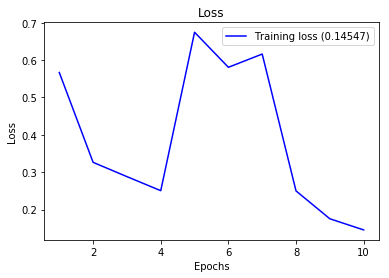

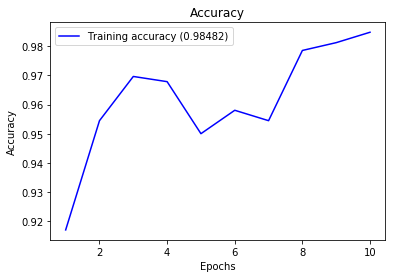

Epoch 1/10
1120/1120 [==============================] - 2s 1ms/step - loss: 0.4710 - acc: 0.9241
Epoch 2/10
1120/1120 [==============================] - 1s 827us/step - loss: 0.4499 - acc: 0.9545
Epoch 3/10
1120/1120 [==============================] - 1s 885us/step - loss: 0.1844 - acc: 0.9795
Epoch 4/10
1120/1120 [==============================] - 1s 906us/step - loss: 0.3190 - acc: 0.9696
Epoch 5/10
1120/1120 [==============================] - 1s 911us/step - loss: 0.1624 - acc: 0.9866
Epoch 6/10
1120/1120 [==============================] - 1s 920us/step - loss: 0.1461 - acc: 0.9866
Epoch 7/10
1120/1120 [==============================] - 1s 725us/step - loss: 0.1553 - acc: 0.9875
Epoch 8/10
1120/1120 [==============================] - 1s 824us/step - loss: 0.1230 - acc: 0.9911
Epoch 9/10
1120/1120 [==============================] - 1s 776us/step - loss: 0.1673 - acc: 0.9884
Epoch 10/10
280/280 [==============================] - 0s 821us/step
acc: 94.64%
[96.0714284011296, 94.64285697

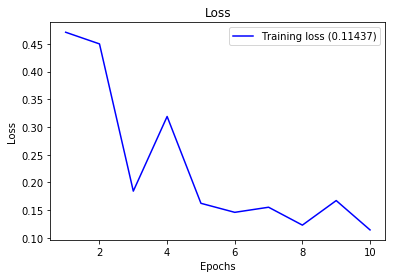

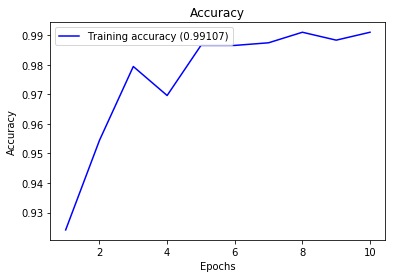

Epoch 1/10
1120/1120 [==============================] - 1s 1ms/step - loss: 0.4910 - acc: 0.9295
Epoch 2/10
1120/1120 [==============================] - 1s 765us/step - loss: 0.3391 - acc: 0.9634
Epoch 3/10
1120/1120 [==============================] - 1s 773us/step - loss: 0.2524 - acc: 0.9723
Epoch 4/10
1120/1120 [==============================] - 1s 819us/step - loss: 0.2102 - acc: 0.9786
Epoch 5/10
1120/1120 [==============================] - 1s 797us/step - loss: 0.1856 - acc: 0.9795
Epoch 6/10
1120/1120 [==============================] - 1s 887us/step - loss: 0.1985 - acc: 0.9786
Epoch 7/10
1120/1120 [==============================] - 1s 770us/step - loss: 0.1570 - acc: 0.9848
Epoch 8/10
1120/1120 [==============================] - 1s 756us/step - loss: 0.1096 - acc: 0.9893
Epoch 9/10
1120/1120 [==============================] - 1s 754us/step - loss: 0.2277 - acc: 0.9804
Epoch 10/10
280/280 [==============================] - 0s 864us/step
acc: 96.07%
[96.0714284011296, 94.64285697

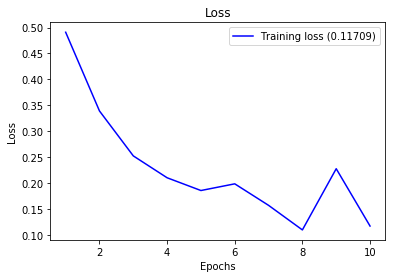

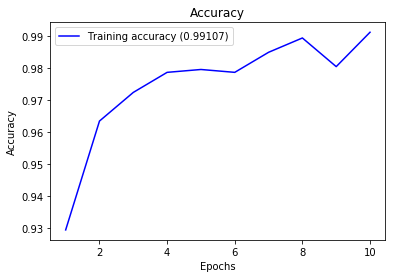

Epoch 1/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.5882 - acc: 0.9152
Epoch 2/10
1120/1120 [==============================] - 1s 968us/step - loss: 0.4551 - acc: 0.9589
Epoch 3/10
1120/1120 [==============================] - 1s 907us/step - loss: 0.2120 - acc: 0.9741
Epoch 4/10
1120/1120 [==============================] - 1s 1ms/step - loss: 0.2346 - acc: 0.9759
Epoch 5/10
1120/1120 [==============================] - 1s 943us/step - loss: 0.1852 - acc: 0.9813
Epoch 6/10
1120/1120 [==============================] - 1s 891us/step - loss: 0.2073 - acc: 0.9830
Epoch 7/10
1120/1120 [==============================] - 1s 872us/step - loss: 0.1347 - acc: 0.9866
Epoch 8/10
1120/1120 [==============================] - 1s 929us/step - loss: 0.1713 - acc: 0.9839
Epoch 9/10
1120/1120 [==============================] - 1s 838us/step - loss: 0.1410 - acc: 0.9893
Epoch 10/10
280/280 [==============================] - 0s 851us/step
acc: 97.14%
[96.0714284011296, 94.6428569725

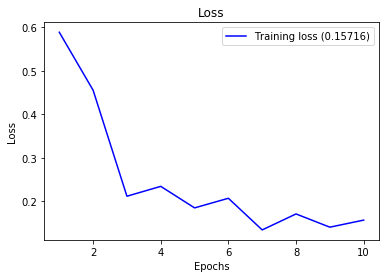

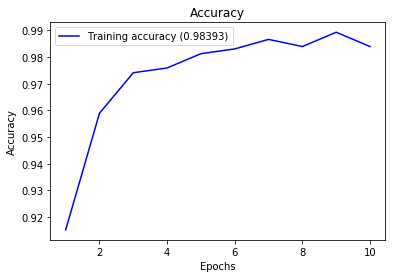

Epoch 1/10
1120/1120 [==============================] - 1s 1ms/step - loss: 0.6991 - acc: 0.8902
Epoch 2/10
1120/1120 [==============================] - 1s 722us/step - loss: 0.2705 - acc: 0.9625
Epoch 3/10
1120/1120 [==============================] - 1s 707us/step - loss: 0.2361 - acc: 0.9723
Epoch 4/10
1120/1120 [==============================] - 1s 843us/step - loss: 0.2148 - acc: 0.9714
Epoch 5/10
1120/1120 [==============================] - 1s 871us/step - loss: 0.1935 - acc: 0.9741
Epoch 6/10
1120/1120 [==============================] - 1s 716us/step - loss: 0.1573 - acc: 0.9830
Epoch 7/10
1120/1120 [==============================] - 1s 927us/step - loss: 0.2220 - acc: 0.9786
Epoch 8/10
1120/1120 [==============================] - 1s 1ms/step - loss: 0.1762 - acc: 0.9804
Epoch 9/10
1120/1120 [==============================] - 1s 1ms/step - loss: 0.1020 - acc: 0.9884
Epoch 10/10
280/280 [==============================] - 0s 921us/step
acc: 97.14%
[96.0714284011296, 94.642856972558

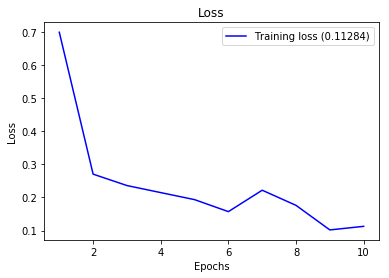

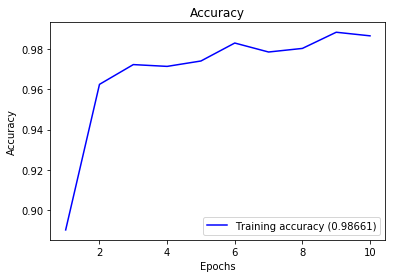

In [22]:
mlf.run_deep_learning_loop(features_all, label_all)

### Run Deep Learning Models on <100 Gene Signature for nt.all

Epoch 1/10
1120/1120 [==============================] - 1s 709us/step - loss: 0.5771 - acc: 0.7509
Epoch 2/10
1120/1120 [==============================] - 0s 64us/step - loss: 0.3834 - acc: 0.8759
Epoch 3/10
1120/1120 [==============================] - 0s 60us/step - loss: 0.2985 - acc: 0.8973
Epoch 4/10
1120/1120 [==============================] - 0s 93us/step - loss: 0.2513 - acc: 0.9196
Epoch 5/10
1120/1120 [==============================] - 0s 94us/step - loss: 0.2211 - acc: 0.9259
Epoch 6/10
1120/1120 [==============================] - 0s 89us/step - loss: 0.2004 - acc: 0.9268
Epoch 7/10
1120/1120 [==============================] - 0s 86us/step - loss: 0.1853 - acc: 0.9357
Epoch 8/10
1120/1120 [==============================] - 0s 87us/step - loss: 0.1744 - acc: 0.9402
Epoch 9/10
1120/1120 [==============================] - 0s 67us/step - loss: 0.1653 - acc: 0.9402
Epoch 10/10
280/280 [==============================] - 0s 949us/step
acc: 92.86%
[92.85714268684387]


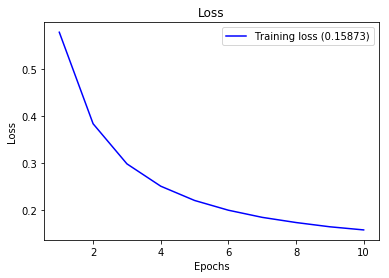

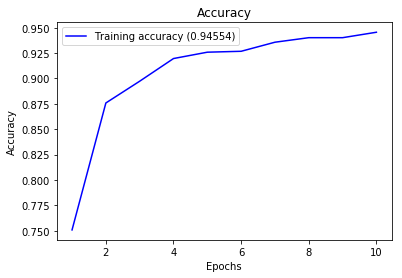

Epoch 1/10
1120/1120 [==============================] - 1s 737us/step - loss: 0.5266 - acc: 0.7804
Epoch 2/10
1120/1120 [==============================] - 0s 77us/step - loss: 0.3414 - acc: 0.8982
Epoch 3/10
1120/1120 [==============================] - 0s 74us/step - loss: 0.2622 - acc: 0.9152
Epoch 4/10
1120/1120 [==============================] - 0s 71us/step - loss: 0.2247 - acc: 0.9223
Epoch 5/10
1120/1120 [==============================] - 0s 71us/step - loss: 0.2024 - acc: 0.9295
Epoch 6/10
1120/1120 [==============================] - 0s 69us/step - loss: 0.1879 - acc: 0.9321
Epoch 7/10
1120/1120 [==============================] - 0s 70us/step - loss: 0.1784 - acc: 0.9357
Epoch 8/10
1120/1120 [==============================] - 0s 68us/step - loss: 0.1704 - acc: 0.9438
Epoch 9/10
1120/1120 [==============================] - 0s 77us/step - loss: 0.1645 - acc: 0.9429
Epoch 10/10
280/280 [==============================] - 0s 711us/step
acc: 92.14%
[92.85714268684387, 92.1428571428571

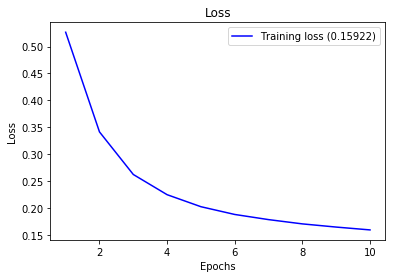

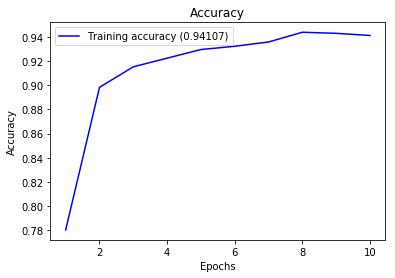

Epoch 1/10
1120/1120 [==============================] - 1s 682us/step - loss: 0.5530 - acc: 0.7571
Epoch 2/10
1120/1120 [==============================] - 0s 50us/step - loss: 0.3411 - acc: 0.8875
Epoch 3/10
1120/1120 [==============================] - 0s 43us/step - loss: 0.2589 - acc: 0.9179
Epoch 4/10
1120/1120 [==============================] - 0s 40us/step - loss: 0.2174 - acc: 0.9259
Epoch 5/10
1120/1120 [==============================] - 0s 39us/step - loss: 0.1908 - acc: 0.9366
Epoch 6/10
1120/1120 [==============================] - 0s 39us/step - loss: 0.1749 - acc: 0.9420
Epoch 7/10
1120/1120 [==============================] - 0s 54us/step - loss: 0.1626 - acc: 0.9509
Epoch 8/10
1120/1120 [==============================] - 0s 63us/step - loss: 0.1533 - acc: 0.9482
Epoch 9/10
1120/1120 [==============================] - 0s 70us/step - loss: 0.1458 - acc: 0.9509
Epoch 10/10
280/280 [==============================] - 0s 1000us/step
acc: 90.36%
[92.85714268684387, 92.142857142857

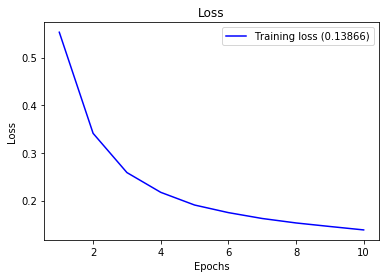

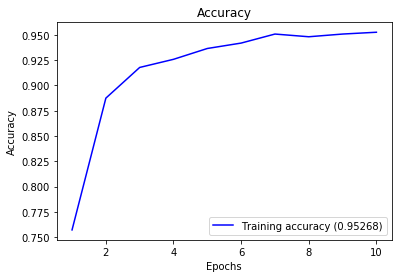

Epoch 1/10
1120/1120 [==============================] - 1s 586us/step - loss: 0.6074 - acc: 0.7214
Epoch 2/10
1120/1120 [==============================] - 0s 41us/step - loss: 0.3666 - acc: 0.8759
Epoch 3/10
1120/1120 [==============================] - 0s 39us/step - loss: 0.2797 - acc: 0.8991
Epoch 4/10
1120/1120 [==============================] - 0s 36us/step - loss: 0.2360 - acc: 0.9071
Epoch 5/10
1120/1120 [==============================] - 0s 42us/step - loss: 0.2113 - acc: 0.9170
Epoch 6/10
1120/1120 [==============================] - 0s 37us/step - loss: 0.1933 - acc: 0.9232
Epoch 7/10
1120/1120 [==============================] - 0s 35us/step - loss: 0.1808 - acc: 0.9321
Epoch 8/10
1120/1120 [==============================] - 0s 41us/step - loss: 0.1722 - acc: 0.9339
Epoch 9/10
1120/1120 [==============================] - 0s 35us/step - loss: 0.1646 - acc: 0.9375
Epoch 10/10
280/280 [==============================] - 0s 924us/step
acc: 95.36%
[92.85714268684387, 92.1428571428571

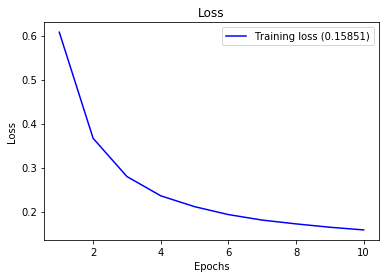

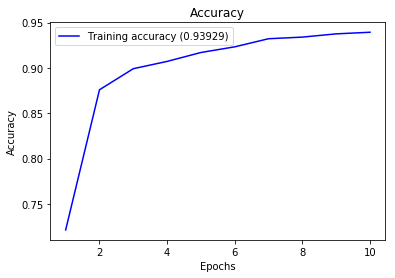

Epoch 1/10
1120/1120 [==============================] - 1s 790us/step - loss: 0.5420 - acc: 0.7571
Epoch 2/10
1120/1120 [==============================] - 0s 71us/step - loss: 0.3465 - acc: 0.8679
Epoch 3/10
1120/1120 [==============================] - 0s 53us/step - loss: 0.2650 - acc: 0.9054
Epoch 4/10
1120/1120 [==============================] - 0s 49us/step - loss: 0.2258 - acc: 0.9125
Epoch 5/10
1120/1120 [==============================] - 0s 41us/step - loss: 0.2033 - acc: 0.9196
Epoch 6/10
1120/1120 [==============================] - 0s 37us/step - loss: 0.1872 - acc: 0.9304
Epoch 7/10
1120/1120 [==============================] - 0s 54us/step - loss: 0.1761 - acc: 0.9330
Epoch 8/10
1120/1120 [==============================] - 0s 45us/step - loss: 0.1680 - acc: 0.9357
Epoch 9/10
1120/1120 [==============================] - 0s 44us/step - loss: 0.1610 - acc: 0.9384
Epoch 10/10
280/280 [==============================] - 0s 731us/step
acc: 92.86%
[92.85714268684387, 92.1428571428571

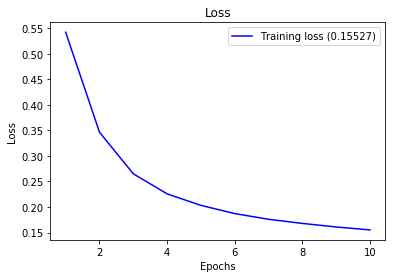

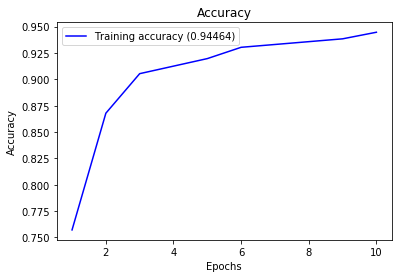

In [23]:
mlf.run_deep_learning_loop(gene_selection_99_features_ntall, label_all)

## <font color='darkblue'>Part 2</font>

### Read in Data - type.coding

In [3]:
type_coding = pd.read_csv('/Users/saptarshighose/Downloads/type.coding.csv')

In [4]:
type_coding.head()

,Type,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,ENSG00000001461.15,ENSG00000001497.15,ENSG00000001561.6,ENSG00000001617.10,ENSG00000001626.13,ENSG00000001629.8,ENSG00000001630.14,ENSG00000001631.13,ENSG00000002016.15,ENSG00000002330.12,ENSG00000002549.11,ENSG00000002586.16,ENSG00000002587.8,ENSG00000002726.18,ENSG00000002745.11,ENSG00000002746.13,ENSG00000002822.14,ENSG00000002834.16,ENSG00000002919.13,ENSG00000002933.6,ENSG00000003056.6,ENSG00000003096.12,ENSG00000003137.7,ENSG00000003147.16,ENSG00000003249.12,ENSG00000003393.13,ENSG00000003400.13,ENSG00000003402.18,ENSG00000003436.13,ENSG00000003509.14,ENSG00000003756.15,ENSG00000003987.12,ENSG00000003989.15,ENSG00000004059.9,ENSG00000004139.12,ENSG00000004399.11,ENSG00000004455.15,ENSG00000004468.11,ENSG00000004478.7,ENSG00000004487.14,ENSG00000004534.13,ENSG00000004660.13,ENSG00000004700.14,ENSG00000004766.14,ENSG00000004776.10,ENSG00000004777.17,ENSG00000004779.8,ENSG00000004799.7,ENSG00000004809.12,ENSG00000004838.12,ENSG00000004846.15,ENSG00000004848.6,ENSG00000004864.12,ENSG00000004866.17,ENSG00000004897.10,ENSG00000004939.12,ENSG00000004948.12,ENSG00000004961.13,ENSG00000004975.10,ENSG00000005001.8,ENSG00000005007.11,ENSG00000005020.11,ENSG00000005022.5,ENSG00000005059.14,ENSG00000005073.5,ENSG00000005075.14,ENSG00000005100.11,ENSG00000005102.11,ENSG00000005108.14,ENSG00000005156.10,ENSG00000005175.8,ENSG00000005187.10,ENSG00000005189.18,ENSG00000005194.13,ENSG00000005238.18,ENSG00000005243.8,ENSG00000005249.11,ENSG00000005302.16,ENSG00000005339.11,ENSG00000005379.14,ENSG00000005381.7,ENSG00000005421.7,ENSG00000005436.12,ENSG00000005448.15,ENSG00000005469.10,ENSG00000005471.14,ENSG00000005483.18,ENSG00000005486.15,ENSG00000005513.9,ENSG00000005700.13,ENSG00000005801.15,ENSG00000005810.16,ENSG00000005812.9,ENSG00000005844.16,ENSG00000005882.10,ENSG00000005884.16,ENSG00000005889.14,ENSG00000005893.14,ENSG00000005961.16,ENSG00000005981.11,ENSG00000006007.10,ENSG00000006015.16,ENSG00000006016.9,ENSG00000006025.10,ENSG00000006042.10,ENSG00000006047.11,ENSG00000006059.3,ENSG00000006071.10,ENSG00000006116.3,ENSG00000006118.13,ENSG00000006125.15,ENSG00000006128.10,ENSG00000006194.9,ENSG00000006210.6,ENSG00000006282.18,ENSG00000006283.16,ENSG00000006327.12,ENSG00000006377.10,ENSG00000006432.14,ENSG00000006451.6,ENSG00000006453.12,ENSG00000006459.9,ENSG00000006468.12,ENSG00000006530.14,ENSG00000006555.9,ENSG00000006576.15,ENSG00000006606.7,ENSG00000006607.12,ENSG00000006611.14,ENSG00000006625.16,ENSG00000006634.6,ENSG00000006638.10,ENSG00000006652.12,ENSG00000006659.11,ENSG00000006695.9,ENSG00000006704.9,ENSG00000006712.13,ENSG00000006715.14,ENSG00000006740.15,ENSG00000006744.17,ENSG00000006747.13,ENSG00000006756.14,ENSG00000006757.10,ENSG00000006788.11,ENSG00000006831.9,ENSG00000006837.10,ENSG00000007001.11,ENSG00000007038.9,ENSG00000007047.13,ENSG00000007062.10,ENSG00000007080.9,ENSG00000007129.16,ENSG00000007168.11,ENSG00000007171.15,ENSG00000007174.16,ENSG00000007202.13,ENSG00000007216.13,ENSG00000007237.17,ENSG00000007255.9,ENSG00000007264.12,ENSG00000007306.13,ENSG00000007312.11,ENSG00000007314.10,ENSG00000007341.17,ENSG00000007350.15,ENSG00000007372.19,ENSG00000007376.6,ENSG00000007384.14,ENSG00000007392.15,ENSG00000007402.10,ENSG00000007516.12,ENSG00000007520.3,ENSG00000007541.13,ENSG00000007545.14,ENSG00000007866.17,ENSG00000007908.14,ENSG00000007923.14,ENSG00000007933.11,ENSG00000007944.13,ENSG00000007952.16,ENSG00000007968.6,ENSG00000008018.8,ENSG00000008056.11,ENSG00000008083.12,ENSG00000008086.9,ENSG00000008118.8,ENSG00000008128.21,ENSG00000008130.14,ENSG00000008196.11,ENSG00000008197.4,ENSG00000008226.18,ENSG00000008256.14,ENSG00000008277.13,ENSG00000008282.6,ENSG00000008283.14,ENSG00000008294.19,ENSG00000008300.13,ENSG00000008311.13,ENSG00000008323.14,ENSG00000008324.9,ENSG00000008382.14,ENSG000000083

In [5]:
features_type_coding = type_coding.loc[:, type_coding.columns != 'Type']

In [6]:
label_type_coding = type_coding.loc[:, type_coding.columns == 'Type']

### Run Machine Learning Pipeline Loop for type.coding (Random Forest, Logistic Regression, and Naive Bayes Algorithms)

In [41]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
label_type_coding = array(label_type_coding)
print(label_type_coding)
# one hot encode
encoded = to_categorical(label_type_coding)
print(encoded)
# invert encoding
inverted = argmax(encoded[0])
print(inverted)

[[16]
 [12]
 [ 5]
 ...
 [14]
 [ 1]
 [14]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
16


### One-hot encoding for label

In [43]:
features_type_coding = features_type_coding.values

In [27]:
# features_type_coding = onehotencoder.fit_transform(features_type_coding).toarray()

In [9]:
mlf.run_simple_loop(features_type_coding, label_type_coding, ['LR'])

LR


ValueError: multiclass format is not supported

### Feature Selection: <100 Gene Signature for type.coding 

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=99)
selector.fit(features_type_coding, label_type_coding)

# X_new = selector.transform(features)
# print(X_new.shape)

feature_selection_99_type_coding = features_type_coding.columns[selector.get_support(indices=True)]

feature_selection_type_coding_list = feature_selection_99_type_coding.tolist()
print(feature_selection_type_coding_list)

['ENSG00000021852.11', 'ENSG00000057149.13', 'ENSG00000066813.13', 'ENSG00000072080.9', 'ENSG00000077498.8', 'ENSG00000079557.4', 'ENSG00000080910.10', 'ENSG00000081800.7', 'ENSG00000090402.6', 'ENSG00000101323.4', 'ENSG00000101981.9', 'ENSG00000109181.10', 'ENSG00000110244.6', 'ENSG00000110245.10', 'ENSG00000110484.6', 'ENSG00000111701.6', 'ENSG00000112337.9', 'ENSG00000113492.12', 'ENSG00000122852.13', 'ENSG00000123561.13', 'ENSG00000124568.9', 'ENSG00000124900.11', 'ENSG00000132703.3', 'ENSG00000134389.9', 'ENSG00000135220.9', 'ENSG00000136297.13', 'ENSG00000136352.16', 'ENSG00000137251.14', 'ENSG00000142484.6', 'ENSG00000142515.13', 'ENSG00000143278.3', 'ENSG00000145321.11', 'ENSG00000145826.7', 'ENSG00000146039.9', 'ENSG00000157131.10', 'ENSG00000159182.4', 'ENSG00000159516.8', 'ENSG00000163202.4', 'ENSG00000163209.13', 'ENSG00000163216.6', 'ENSG00000163581.12', 'ENSG00000163586.8', 'ENSG00000164325.7', 'ENSG00000164600.5', 'ENSG00000164816.7', 'ENSG00000165471.6', 'ENSG0000016851

### Run Keras Deep Learning Models for type.coding

Epoch 1/10
4320/4320 [==============================] - 5s 1ms/step - loss: -130.0972 - acc: 0.0262
Epoch 2/10
4320/4320 [==============================] - 4s 868us/step - loss: -135.4611 - acc: 0.0549
Epoch 3/10
4320/4320 [==============================] - 4s 856us/step - loss: -135.5103 - acc: 0.0556
Epoch 4/10
4320/4320 [==============================] - 4s 931us/step - loss: -135.5103 - acc: 0.0556
Epoch 5/10
4320/4320 [==============================] - 4s 918us/step - loss: -135.5103 - acc: 0.0556
Epoch 6/10
4320/4320 [==============================] - 4s 923us/step - loss: -135.5103 - acc: 0.0556
Epoch 7/10
4320/4320 [==============================] - 4s 891us/step - loss: -135.5103 - acc: 0.0556
Epoch 8/10
4320/4320 [==============================] - 4s 977us/step - loss: -135.5103 - acc: 0.0556
Epoch 9/10
4320/4320 [==============================] - 4s 984us/step - loss: -135.5103 - acc: 0.0556
Epoch 10/10
1080/1080 [==============================] - 1s 557us/step
acc: 5.56%
[5

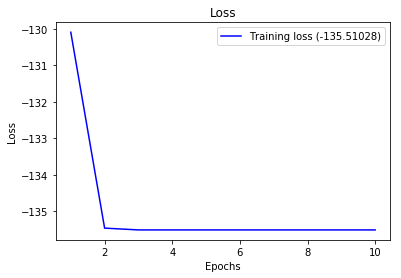

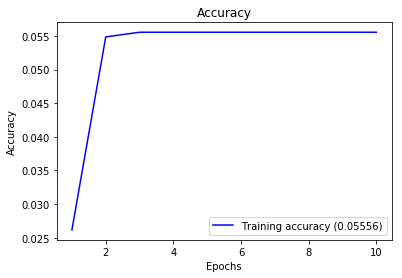

Epoch 1/10
4320/4320 [==============================] - 5s 1ms/step - loss: -130.9998 - acc: 0.0178
Epoch 2/10
4320/4320 [==============================] - 4s 819us/step - loss: -134.8278 - acc: 0.0563
Epoch 3/10
4320/4320 [==============================] - 4s 885us/step - loss: -134.8567 - acc: 0.0567
Epoch 4/10
4320/4320 [==============================] - 4s 874us/step - loss: -134.9789 - acc: 0.0567
Epoch 5/10
4320/4320 [==============================] - 4s 908us/step - loss: -134.9789 - acc: 0.0567
Epoch 6/10
4320/4320 [==============================] - 4s 827us/step - loss: -134.9789 - acc: 0.0567
Epoch 7/10
4320/4320 [==============================] - 3s 735us/step - loss: -134.9789 - acc: 0.0567
Epoch 8/10
4320/4320 [==============================] - 4s 828us/step - loss: -134.9789 - acc: 0.0567
Epoch 9/10
4320/4320 [==============================] - 4s 846us/step - loss: -134.9789 - acc: 0.0567
Epoch 10/10
1080/1080 [==============================] - 1s 532us/step
acc: 5.09%
[5

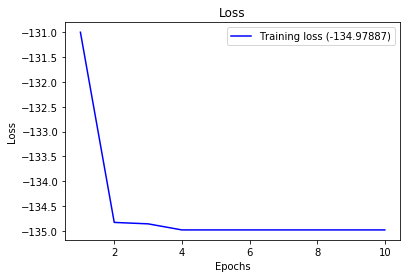

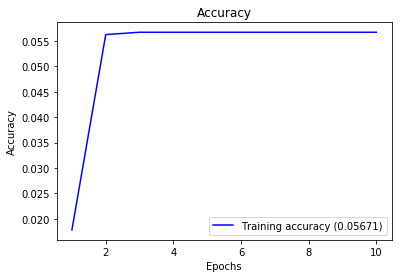

Epoch 1/10
4320/4320 [==============================] - 5s 1ms/step - loss: -129.4551 - acc: 2.3148e-04
Epoch 2/10
4320/4320 [==============================] - 4s 867us/step - loss: -134.2570 - acc: 0.0000e+00
Epoch 3/10
4320/4320 [==============================] - 4s 1ms/step - loss: -134.3245 - acc: 6.9444e-04
Epoch 4/10
4320/4320 [==============================] - 4s 842us/step - loss: -134.6489 - acc: 0.0312
Epoch 5/10
4320/4320 [==============================] - 3s 781us/step - loss: -135.2704 - acc: 0.0583
Epoch 6/10
4320/4320 [==============================] - 4s 938us/step - loss: -135.2704 - acc: 0.0583
Epoch 7/10
4320/4320 [==============================] - 4s 875us/step - loss: -135.2704 - acc: 0.0583
Epoch 8/10
4320/4320 [==============================] - 4s 852us/step - loss: -135.2704 - acc: 0.0583
Epoch 9/10
4320/4320 [==============================] - 3s 786us/step - loss: -135.2704 - acc: 0.0583
Epoch 10/10
1080/1080 [==============================] - 1s 676us/step
acc

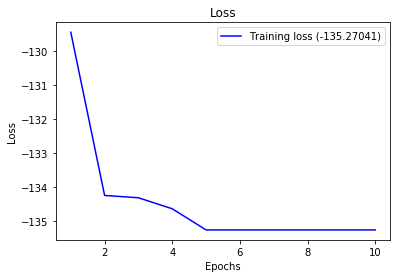

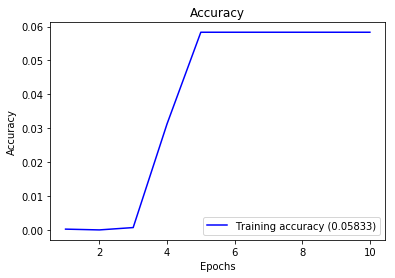

Epoch 1/10
4320/4320 [==============================] - 4s 955us/step - loss: -131.4088 - acc: 0.0000e+00
Epoch 2/10
4320/4320 [==============================] - 3s 791us/step - loss: -133.8262 - acc: 0.0014
Epoch 3/10
4320/4320 [==============================] - 4s 879us/step - loss: -134.5730 - acc: 0.0521
Epoch 4/10
4320/4320 [==============================] - 3s 726us/step - loss: -134.6978 - acc: 0.0537
Epoch 5/10
4320/4320 [==============================] - 3s 767us/step - loss: -134.6220 - acc: 0.0537
Epoch 6/10
4320/4320 [==============================] - 3s 693us/step - loss: -134.7021 - acc: 0.0537
Epoch 7/10
4320/4320 [==============================] - 3s 735us/step - loss: -134.7021 - acc: 0.0537
Epoch 8/10
4320/4320 [==============================] - 3s 699us/step - loss: -134.7021 - acc: 0.0537
Epoch 9/10
4320/4320 [==============================] - 3s 598us/step - loss: -134.7021 - acc: 0.0537
Epoch 10/10
1080/1080 [==============================] - 1s 567us/step
acc: 6.

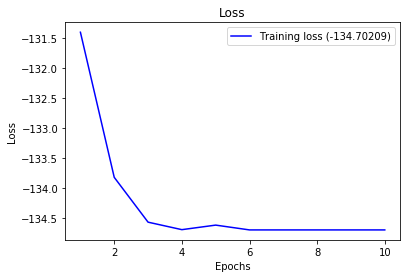

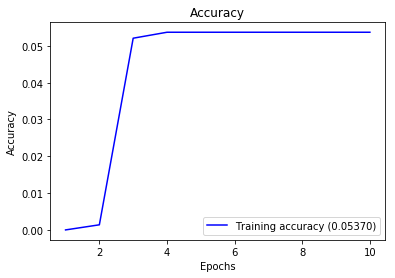

Epoch 1/10
4320/4320 [==============================] - 3s 777us/step - loss: -132.2537 - acc: 0.0000e+00
Epoch 2/10
4320/4320 [==============================] - 3s 748us/step - loss: -136.3529 - acc: 0.0215
Epoch 3/10
4320/4320 [==============================] - 2s 574us/step - loss: -136.9066 - acc: 0.0519
Epoch 4/10
4320/4320 [==============================] - 3s 698us/step - loss: -137.0898 - acc: 0.0535
Epoch 5/10
4320/4320 [==============================] - 3s 744us/step - loss: -137.0898 - acc: 0.0535
Epoch 6/10
4320/4320 [==============================] - 3s 781us/step - loss: -137.0898 - acc: 0.0535
Epoch 7/10
4320/4320 [==============================] - 3s 760us/step - loss: -137.0898 - acc: 0.0535
Epoch 8/10
4320/4320 [==============================] - 3s 790us/step - loss: -137.0898 - acc: 0.0535
Epoch 9/10
4320/4320 [==============================] - 4s 827us/step - loss: -137.0898 - acc: 0.0535
Epoch 10/10
1080/1080 [==============================] - 1s 604us/step
acc: 6.

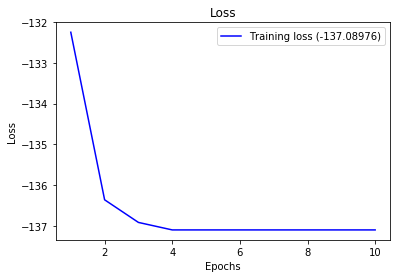

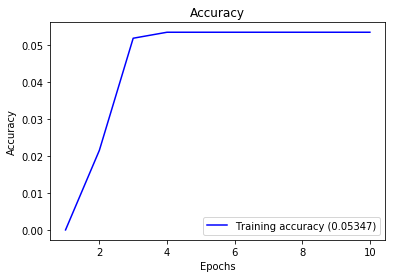

In [76]:
mlf.run_deep_learning_loop(features_type_coding, label_type_coding)

### Run Keras Deep Learning Models on <100 Gene Signature for type.coding

In [ ]:
mlf.run_deep_learning_loop(feature_selection_99_type_coding, label_type_coding)

### Read in Data - type.all

In [51]:
type_all = pd.read_csv('/Users/saptarshighose/Downloads/type.all.csv')

In [52]:
type_all.head()

,Type,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,ENSG00000001461.15,ENSG00000001497.15,ENSG00000001561.6,ENSG00000001617.10,ENSG00000001626.13,ENSG00000001629.8,ENSG00000001630.14,ENSG00000001631.13,ENSG00000002016.15,ENSG00000002079.11,ENSG00000002330.12,ENSG00000002549.11,ENSG00000002586.16,ENSG00000002587.8,ENSG00000002726.18,ENSG00000002745.11,ENSG00000002746.13,ENSG00000002822.14,ENSG00000002834.16,ENSG00000002919.13,ENSG00000002933.6,ENSG00000003056.6,ENSG00000003096.12,ENSG00000003137.7,ENSG00000003147.16,ENSG00000003249.12,ENSG00000003393.13,ENSG00000003400.13,ENSG00000003402.18,ENSG00000003436.13,ENSG00000003509.14,ENSG00000003756.15,ENSG00000003987.12,ENSG00000003989.15,ENSG00000004059.9,ENSG00000004139.12,ENSG00000004142.10,ENSG00000004399.11,ENSG00000004455.15,ENSG00000004468.11,ENSG00000004478.7,ENSG00000004487.14,ENSG00000004534.13,ENSG00000004660.13,ENSG00000004700.14,ENSG00000004766.14,ENSG00000004776.10,ENSG00000004777.17,ENSG00000004779.8,ENSG00000004799.7,ENSG00000004809.12,ENSG00000004838.12,ENSG00000004846.15,ENSG00000004848.6,ENSG00000004864.12,ENSG00000004866.17,ENSG00000004897.10,ENSG00000004939.12,ENSG00000004948.12,ENSG00000004961.13,ENSG00000004975.10,ENSG00000005001.8,ENSG00000005007.11,ENSG00000005020.11,ENSG00000005022.5,ENSG00000005059.14,ENSG00000005073.5,ENSG00000005075.14,ENSG00000005100.11,ENSG00000005102.11,ENSG00000005108.14,ENSG00000005156.10,ENSG00000005175.8,ENSG00000005187.10,ENSG00000005189.18,ENSG00000005194.13,ENSG00000005206.15,ENSG00000005238.18,ENSG00000005243.8,ENSG00000005249.11,ENSG00000005302.16,ENSG00000005339.11,ENSG00000005379.14,ENSG00000005381.7,ENSG00000005421.7,ENSG00000005436.12,ENSG00000005448.15,ENSG00000005469.10,ENSG00000005471.14,ENSG00000005483.18,ENSG00000005486.15,ENSG00000005513.9,ENSG00000005700.13,ENSG00000005801.15,ENSG00000005810.16,ENSG00000005812.9,ENSG00000005844.16,ENSG00000005882.10,ENSG00000005884.16,ENSG00000005889.14,ENSG00000005893.14,ENSG00000005961.16,ENSG00000005981.11,ENSG00000006007.10,ENSG00000006015.16,ENSG00000006016.9,ENSG00000006025.10,ENSG00000006042.10,ENSG00000006047.11,ENSG00000006059.3,ENSG00000006062.12,ENSG00000006071.10,ENSG00000006116.3,ENSG00000006118.13,ENSG00000006125.15,ENSG00000006128.10,ENSG00000006194.9,ENSG00000006210.6,ENSG00000006282.18,ENSG00000006283.16,ENSG00000006327.12,ENSG00000006377.10,ENSG00000006432.14,ENSG00000006451.6,ENSG00000006453.12,ENSG00000006459.9,ENSG00000006468.12,ENSG00000006530.14,ENSG00000006534.14,ENSG00000006555.9,ENSG00000006576.15,ENSG00000006606.7,ENSG00000006607.12,ENSG00000006611.14,ENSG00000006625.16,ENSG00000006634.6,ENSG00000006638.10,ENSG00000006652.12,ENSG00000006659.11,ENSG00000006695.9,ENSG00000006704.9,ENSG00000006712.13,ENSG00000006715.14,ENSG00000006740.15,ENSG00000006744.17,ENSG00000006747.13,ENSG00000006756.14,ENSG00000006757.10,ENSG00000006788.11,ENSG00000006831.9,ENSG00000006837.10,ENSG00000007001.11,ENSG00000007038.9,ENSG00000007047.13,ENSG00000007062.10,ENSG00000007080.9,ENSG00000007129.16,ENSG00000007168.11,ENSG00000007171.15,ENSG00000007174.16,ENSG00000007202.13,ENSG00000007216.13,ENSG00000007237.17,ENSG00000007255.9,ENSG00000007264.12,ENSG00000007306.13,ENSG00000007312.11,ENSG00000007314.10,ENSG00000007341.17,ENSG00000007350.15,ENSG00000007372.19,ENSG00000007376.6,ENSG00000007384.14,ENSG00000007392.15,ENSG00000007402.10,ENSG00000007516.12,ENSG00000007520.3,ENSG00000007541.13,ENSG00000007545.14,ENSG00000007866.17,ENSG00000007908.14,ENSG00000007923.14,ENSG00000007933.11,ENSG00000007944.13,ENSG00000007952.16,ENSG00000007968.6,ENSG00000008018.8,ENSG00000008056.11,ENSG00000008083.12,ENSG00000008086.9,ENSG00000008118.8,ENSG00000008128.21,ENSG00000008130.14,ENSG00000008196.11,ENSG00000008197.4,ENSG00000008226.18,ENSG00000008256.14,ENSG00000008277.13,ENSG00000008282.6,ENSG00000008283.14,ENSG00000008294.19,ENSG00000008

In [53]:
features_type_all = type_all.loc[:, type_all.columns != 'Type']

In [54]:
label_type_all = type_all.loc[:, type_all.columns == 'Type']

### Run Machine Learning Pipeline Loop for type.all

In [ ]:
mlf.run_simple_loop(features_type_all, label_type_all)

### Feature Selection: <100 Gene Signature for type.all

In [55]:
selector = SelectKBest(chi2, k=99)
selector.fit(features_type_all, label_type_all)

# X_new = selector.transform(features)
# print(X_new.shape)

feature_selection_99_type_all = features_type_all.columns[selector.get_support(indices=True)]

feature_selection_type_all_list = feature_selection_99_type_all.tolist()
print(feature_selection_type_all_list)

['ENSG00000080910.10', 'ENSG00000101981.9', 'ENSG00000112337.9', 'ENSG00000124900.11', 'ENSG00000132703.3', 'ENSG00000135220.9', 'ENSG00000145321.11', 'ENSG00000158731.2', 'ENSG00000164325.7', 'ENSG00000168515.3', 'ENSG00000184566.3', 'ENSG00000186146.1', 'ENSG00000199629.1', 'ENSG00000202285.1', 'ENSG00000207816.1', 'ENSG00000207933.2', 'ENSG00000211928.1', 'ENSG00000212057.1', 'ENSG00000212199.1', 'ENSG00000212525.1', 'ENSG00000216020.2', 'ENSG00000221385.1', 'ENSG00000223400.1', 'ENSG00000223914.1', 'ENSG00000224087.1', 'ENSG00000224924.5', 'ENSG00000225765.1', 'ENSG00000226733.1', 'ENSG00000227157.1', 'ENSG00000227306.1', 'ENSG00000227869.1', 'ENSG00000229035.2', 'ENSG00000232153.2', 'ENSG00000234104.1', 'ENSG00000234918.1', 'ENSG00000236267.1', 'ENSG00000236666.1', 'ENSG00000237581.1', 'ENSG00000238102.1', 'ENSG00000238194.1', 'ENSG00000241911.1', 'ENSG00000244239.1', 'ENSG00000248184.1', 'ENSG00000248518.1', 'ENSG00000248709.1', 'ENSG00000250668.1', 'ENSG00000251424.1', 'ENSG0000

### Run Keras Deep Learning Models for type.all

Epoch 1/10
4320/4320 [==============================] - 13s 3ms/step - loss: -118.6677 - acc: 0.0046
Epoch 2/10
4320/4320 [==============================] - 15s 3ms/step - loss: -128.7360 - acc: 0.0382
Epoch 3/10
4320/4320 [==============================] - 13s 3ms/step - loss: -127.6380 - acc: 0.0461
Epoch 4/10
4320/4320 [==============================] - 12s 3ms/step - loss: -127.7565 - acc: 0.0537
Epoch 5/10
4320/4320 [==============================] - 14s 3ms/step - loss: -127.6869 - acc: 0.0532
Epoch 6/10
4320/4320 [==============================] - 15s 4ms/step - loss: -126.5757 - acc: 0.0549
Epoch 7/10
4320/4320 [==============================] - 15s 4ms/step - loss: -127.1173 - acc: 0.0539
Epoch 8/10
4320/4320 [==============================] - 14s 3ms/step - loss: -127.3497 - acc: 0.0546
Epoch 9/10
4320/4320 [==============================] - 15s 3ms/step - loss: -127.3169 - acc: 0.0549
Epoch 10/10
1080/1080 [==============================] - 2s 2ms/step
acc: 5.46%
[5.46296296

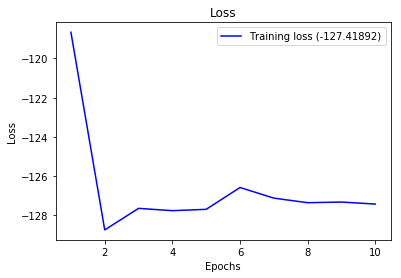

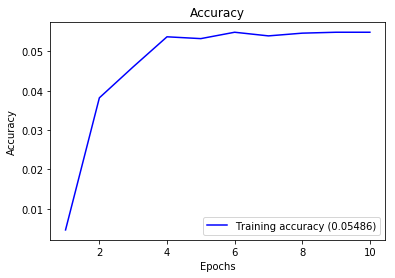

Epoch 1/10
4320/4320 [==============================] - 14s 3ms/step - loss: -124.6674 - acc: 0.0167
Epoch 2/10
4320/4320 [==============================] - 14s 3ms/step - loss: -126.5419 - acc: 0.0475
Epoch 3/10
4320/4320 [==============================] - 15s 3ms/step - loss: -124.1505 - acc: 0.0530
Epoch 4/10
4320/4320 [==============================] - 14s 3ms/step - loss: -123.7374 - acc: 0.0542
Epoch 5/10
4320/4320 [==============================] - 12s 3ms/step - loss: -123.7672 - acc: 0.0546
Epoch 6/10
4320/4320 [==============================] - 12s 3ms/step - loss: -123.7841 - acc: 0.0530
Epoch 7/10
4320/4320 [==============================] - 15s 4ms/step - loss: -123.6260 - acc: 0.0532
Epoch 8/10
4320/4320 [==============================] - 15s 3ms/step - loss: -123.8589 - acc: 0.0523
Epoch 9/10
4320/4320 [==============================] - 12s 3ms/step - loss: -124.1307 - acc: 0.0544
Epoch 10/10
1080/1080 [==============================] - 2s 2ms/step
acc: 5.00%
[5.46296296

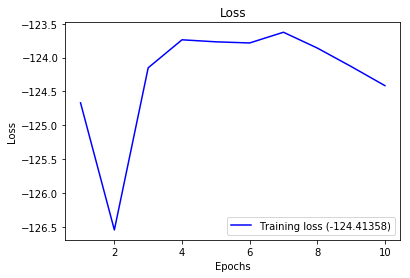

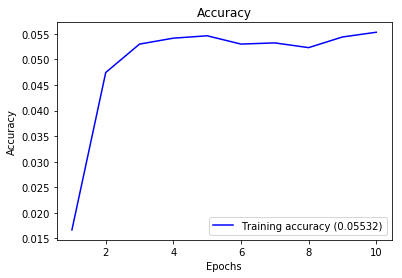

Epoch 1/10
4320/4320 [==============================] - 15s 3ms/step - loss: -124.9987 - acc: 0.0197
Epoch 2/10
4320/4320 [==============================] - 12s 3ms/step - loss: -126.2024 - acc: 0.0481
Epoch 3/10
4320/4320 [==============================] - 13s 3ms/step - loss: -126.0432 - acc: 0.0542
Epoch 4/10
4320/4320 [==============================] - 13s 3ms/step - loss: -126.1578 - acc: 0.0556
Epoch 5/10
4320/4320 [==============================] - 12s 3ms/step - loss: -128.4792 - acc: 0.0574
Epoch 6/10
4320/4320 [==============================] - 12s 3ms/step - loss: -128.7614 - acc: 0.0572
Epoch 7/10
4320/4320 [==============================] - 14s 3ms/step - loss: -128.6076 - acc: 0.0574
Epoch 8/10
4320/4320 [==============================] - 13s 3ms/step - loss: -128.6076 - acc: 0.0574
Epoch 9/10
4320/4320 [==============================] - 13s 3ms/step - loss: -128.6076 - acc: 0.0574
Epoch 10/10
1080/1080 [==============================] - 2s 2ms/step
acc: 4.44%
[5.46296296

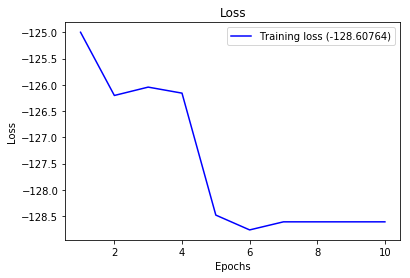

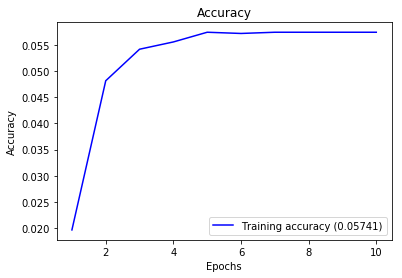

Epoch 1/10
4320/4320 [==============================] - 14s 3ms/step - loss: -114.7086 - acc: 0.0000e+00
Epoch 2/10
4320/4320 [==============================] - 14s 3ms/step - loss: -123.6675 - acc: 0.0000e+00
Epoch 3/10
4320/4320 [==============================] - 14s 3ms/step - loss: -123.6328 - acc: 0.0000e+00
Epoch 4/10
4320/4320 [==============================] - 13s 3ms/step - loss: -123.5938 - acc: 0.0000e+00
Epoch 5/10
4320/4320 [==============================] - 13s 3ms/step - loss: -123.8258 - acc: 0.0000e+00
Epoch 6/10
4320/4320 [==============================] - 12s 3ms/step - loss: -123.8258 - acc: 0.0000e+00
Epoch 7/10
4320/4320 [==============================] - 14s 3ms/step - loss: -123.8258 - acc: 0.0000e+00
Epoch 8/10
4320/4320 [==============================] - 13s 3ms/step - loss: -123.8258 - acc: 0.0000e+00
Epoch 9/10
4320/4320 [==============================] - 14s 3ms/step - loss: -123.8258 - acc: 0.0000e+00
Epoch 10/10
1080/1080 [==============================] 

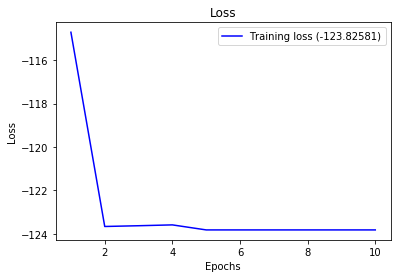

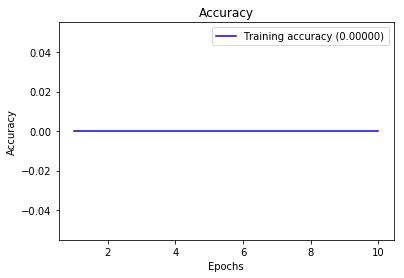

Epoch 1/10
4320/4320 [==============================] - 14s 3ms/step - loss: -119.5857 - acc: 0.0000e+00
Epoch 2/10
4320/4320 [==============================] - 14s 3ms/step - loss: -127.3155 - acc: 0.0000e+00
Epoch 3/10
4320/4320 [==============================] - 14s 3ms/step - loss: -125.5024 - acc: 0.0000e+00
Epoch 4/10
4320/4320 [==============================] - 13s 3ms/step - loss: -125.4549 - acc: 0.0000e+00
Epoch 5/10
4320/4320 [==============================] - 11s 3ms/step - loss: -125.0839 - acc: 0.0000e+00
Epoch 6/10
4320/4320 [==============================] - 11s 3ms/step - loss: -125.3569 - acc: 0.0000e+00
Epoch 7/10
4320/4320 [==============================] - 13s 3ms/step - loss: -125.6169 - acc: 9.2593e-04
Epoch 8/10
4320/4320 [==============================] - 12s 3ms/step - loss: -125.4904 - acc: 0.0359
Epoch 9/10
4320/4320 [==============================] - 12s 3ms/step - loss: -125.9814 - acc: 0.0493
Epoch 10/10
1080/1080 [==============================] - 2s 2ms

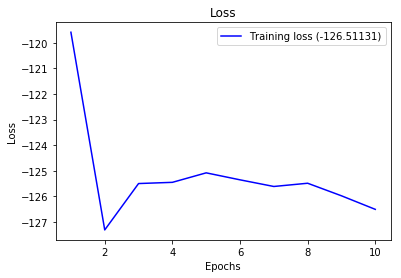

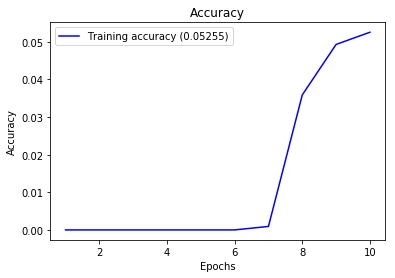

In [58]:
mlf.run_deep_learning_loop(features_type_all, label_type_all)

### Run Deep Learning Models on <100 Gene Signature for nt.all¶

In [59]:
mlf.run_deep_learning_loop(feature_selection_99_type_all, label_type_all)

AttributeError: 'Index' object has no attribute 'loc'